In [1]:
import pandas as pd
import datetime
import locale
import os

import matplotlib.pyplot as plt
from unidecode import unidecode

locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

'pt_BR.utf8'

In [2]:
def format_date(dt, interval = 'm'):
    date = datetime.datetime.strptime(dt, "%Y-%m-%d")
    
    if interval == 'm':
        format_date = (date.strftime("%b")+date.strftime("%y")).upper()
    elif interval == 'w':
        format_date = (date.strftime("%d")+'-'+date.strftime("%b")+date.strftime("%y")).upper()
        
    return format_date

In [3]:
def create_graphs(t_start_date, t_end_date, v_start_date, v_end_date, folder="T1a_V1a_anual"):
    t_form_initial_date = format_date(t_start_date)
    t_form_final_date = format_date(t_end_date)

    v_form_initial_date = format_date(v_start_date)
    v_form_final_date = format_date(v_end_date)

    train_folder = (f"T_{t_start_date}_{t_end_date}")
    validation_folder = (f"V_{v_start_date}_{v_end_date}")

    path = f'../{folder}/{train_folder}/{validation_folder}'

    for file in os.listdir(path):
        if file.endswith(".csv"):

            model = file.split('.')[0]
            df_results = pd.read_csv(f'{path}/{model}.csv')

            err = abs(df_results['variacao_carteira'] - df_results['variacao_benchmark'])

            plt.style.use('seaborn')

            plt.figure(figsize=(12, 8))
            plt.plot(df_results['datas'], err, marker = '.', label=model)
            # plt.plot(df_results['datas'], df_results['variacao_carteira'], marker = '.', label=model)
            plt.legend()

            plt.ylim([0.0, 0.15])

            if (t_start_date == v_start_date) & (t_end_date == v_end_date):
                plt.title(f"Módulo do erro para treino e validação de {t_form_initial_date} a {t_form_final_date}")
            else:
                plt.title(f"Módulo do erro para treino de {t_form_initial_date} a {t_form_final_date} e validação de "
                          f"{v_form_initial_date} a {v_form_final_date}")

            plt.savefig(f'{path}/graficos/mod_erro_{model}.png')
            plt.show()
            plt.close()

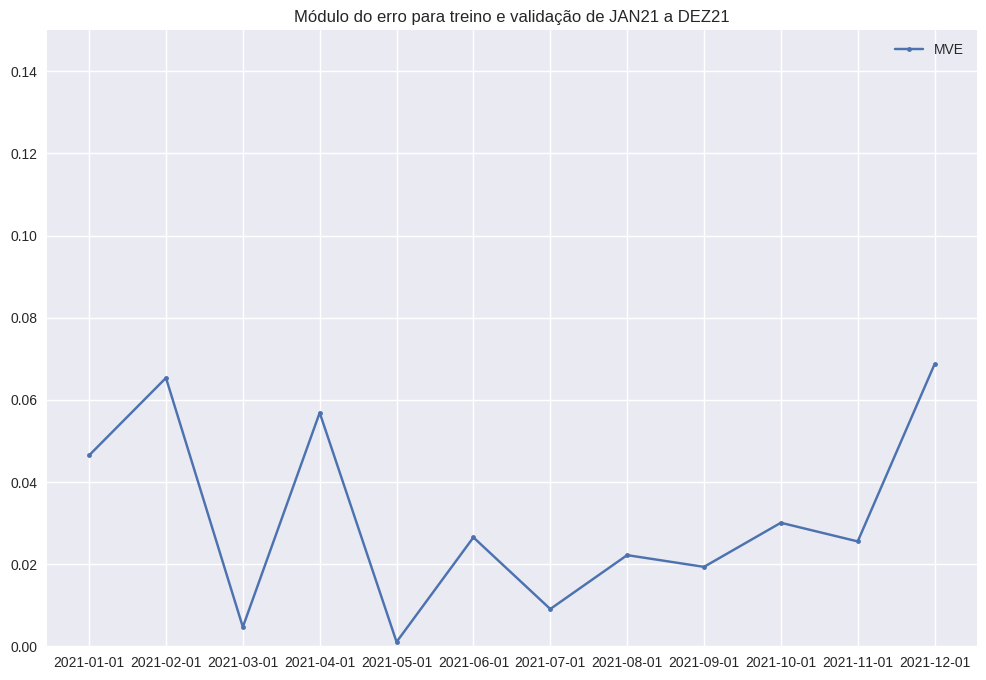

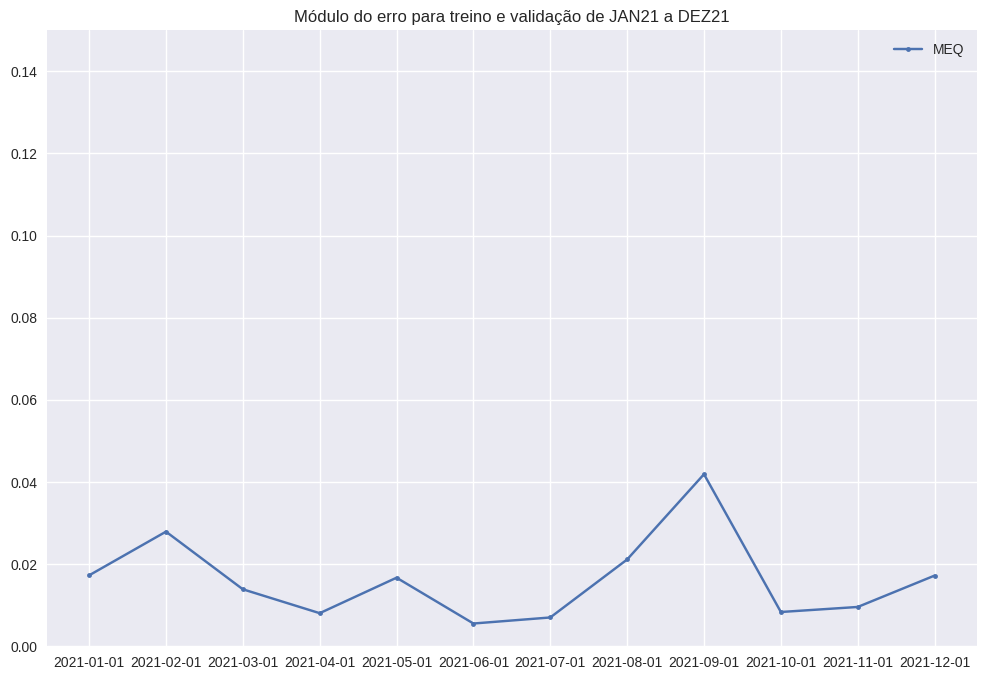

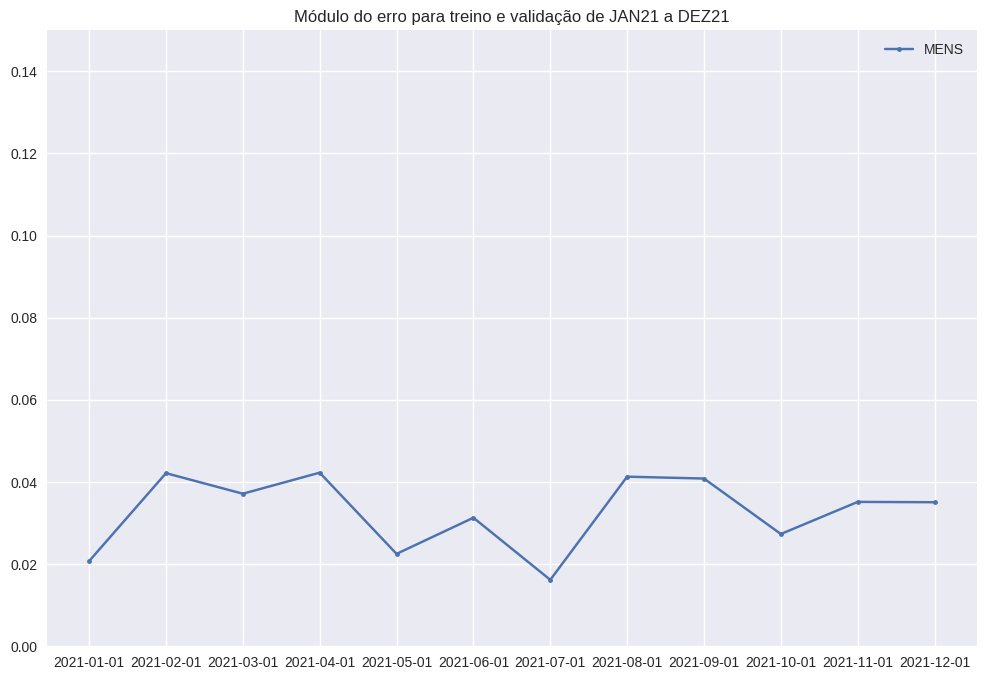

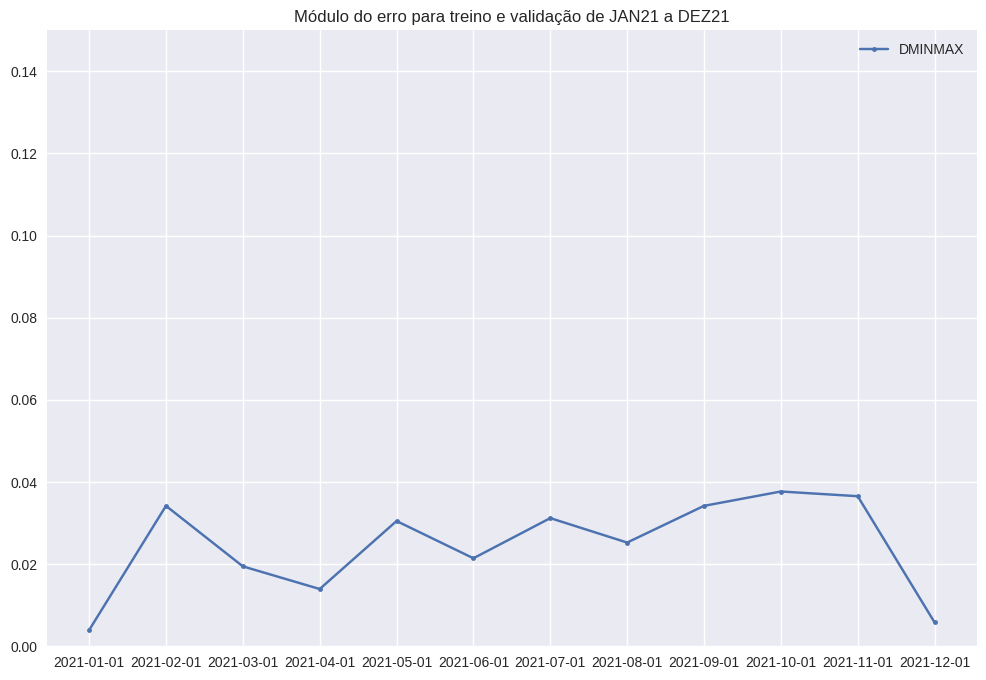

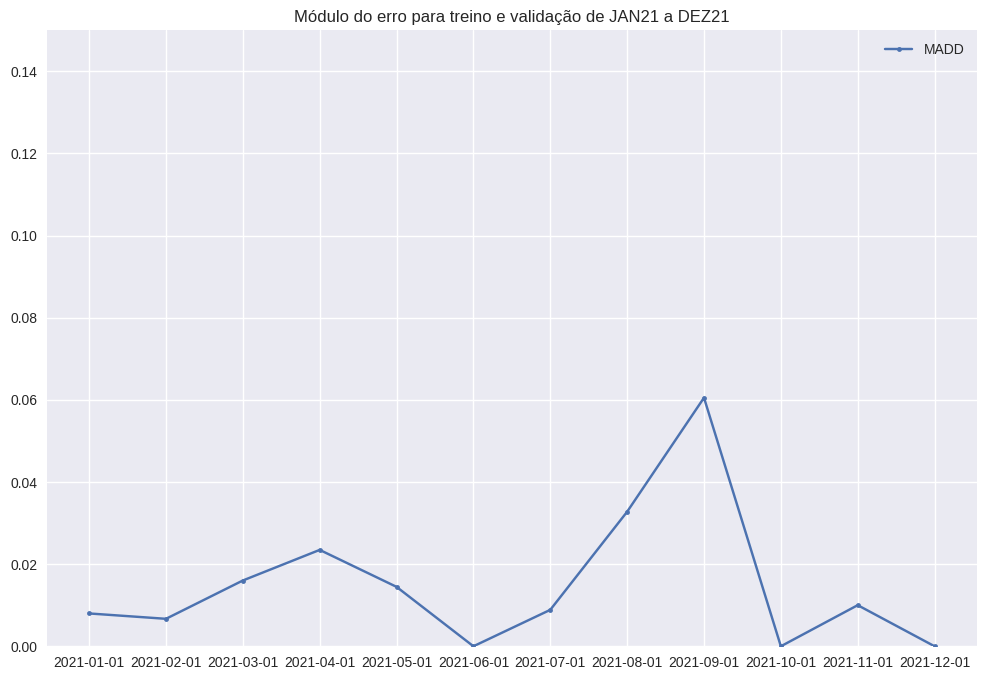

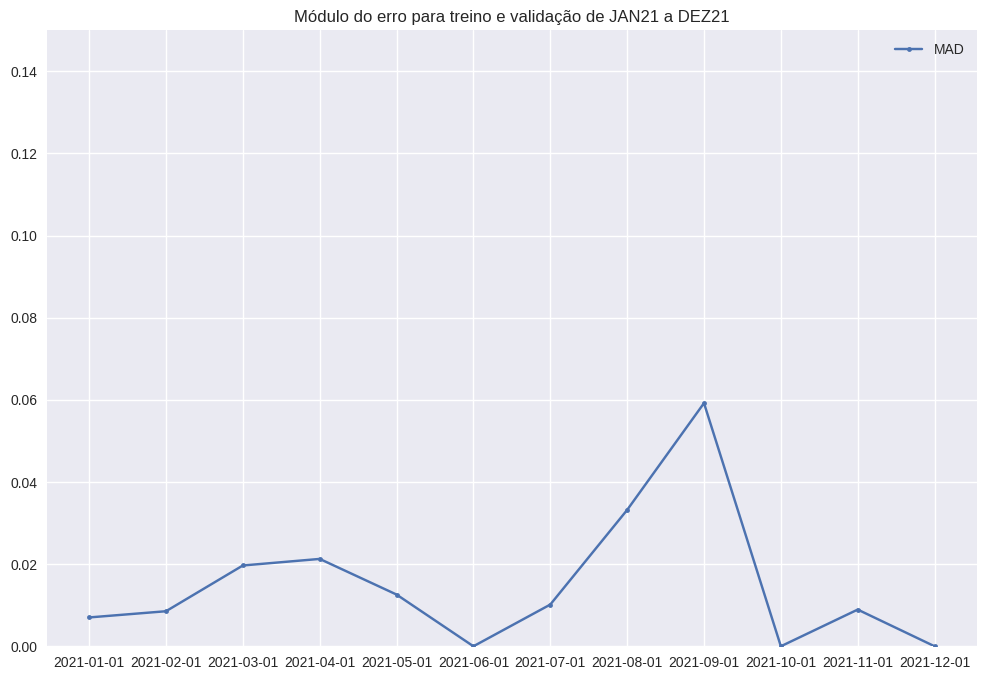

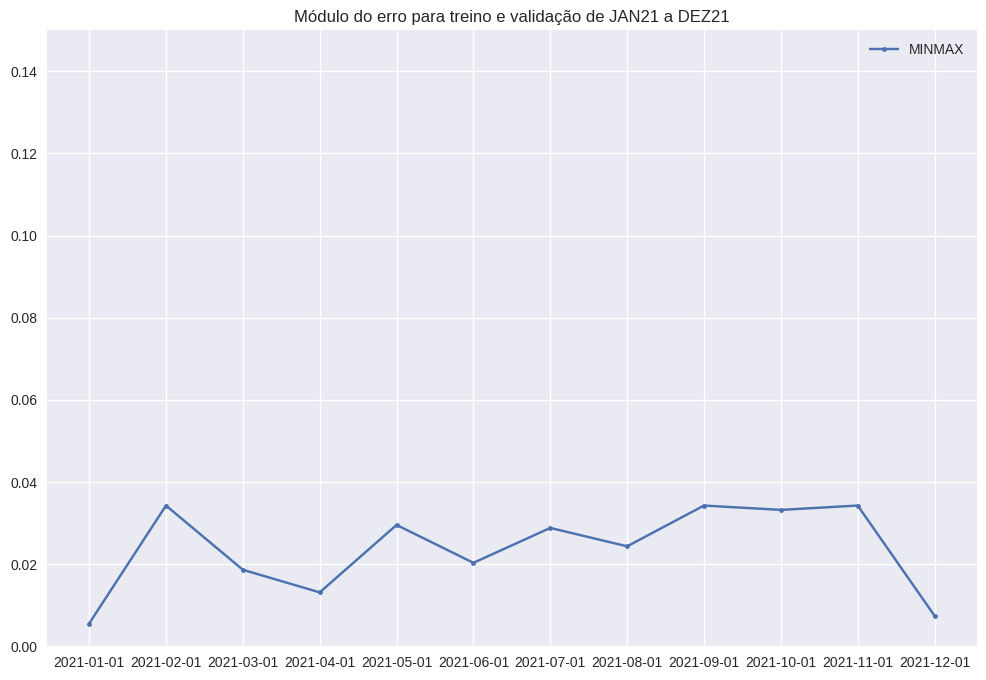

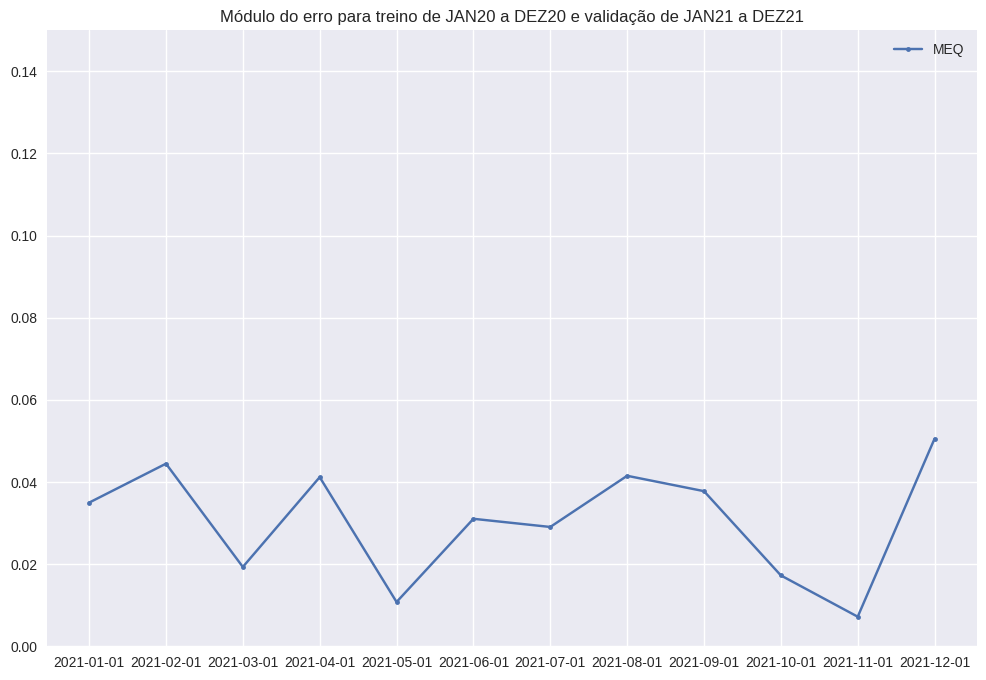

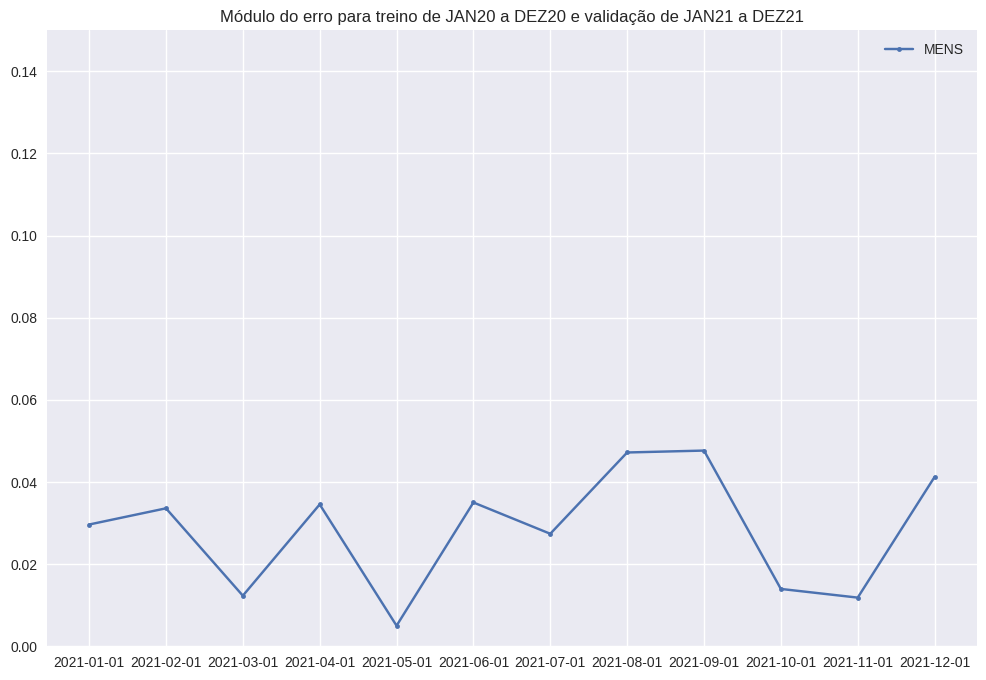

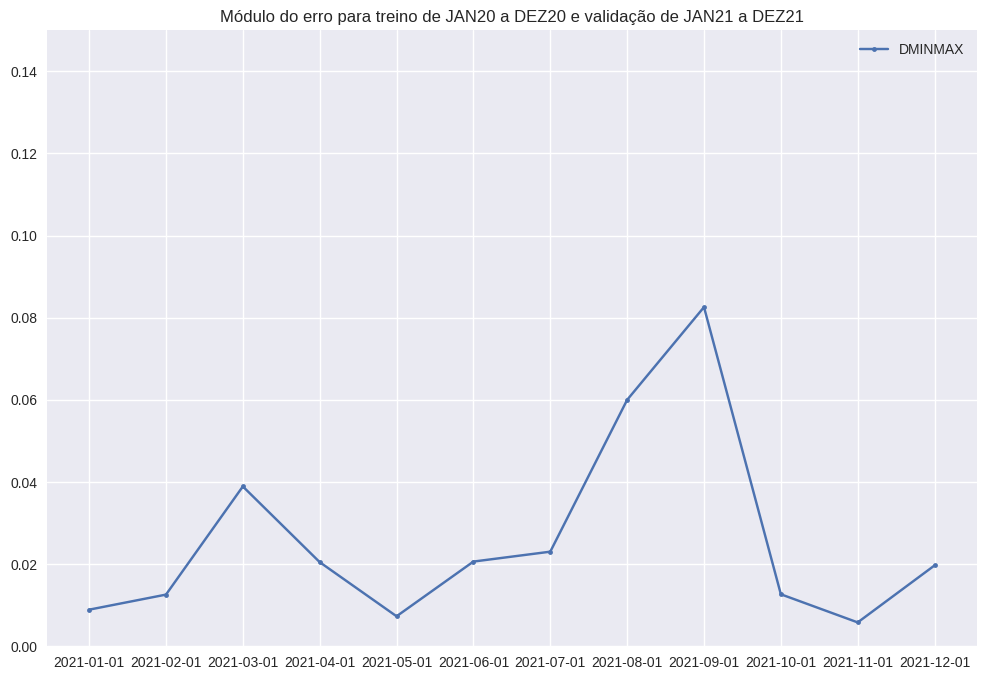

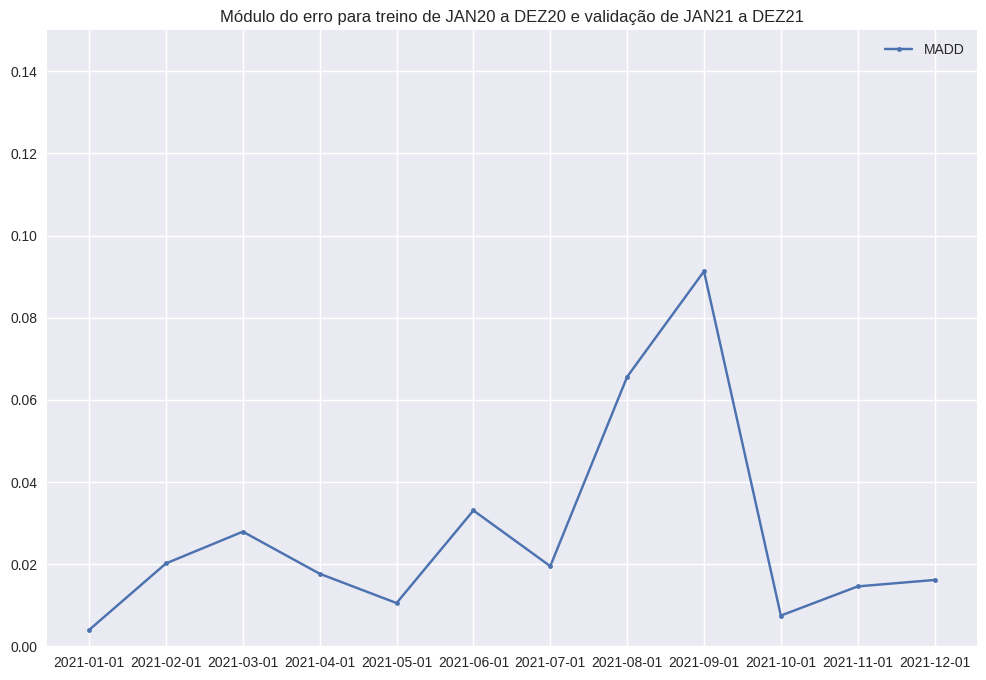

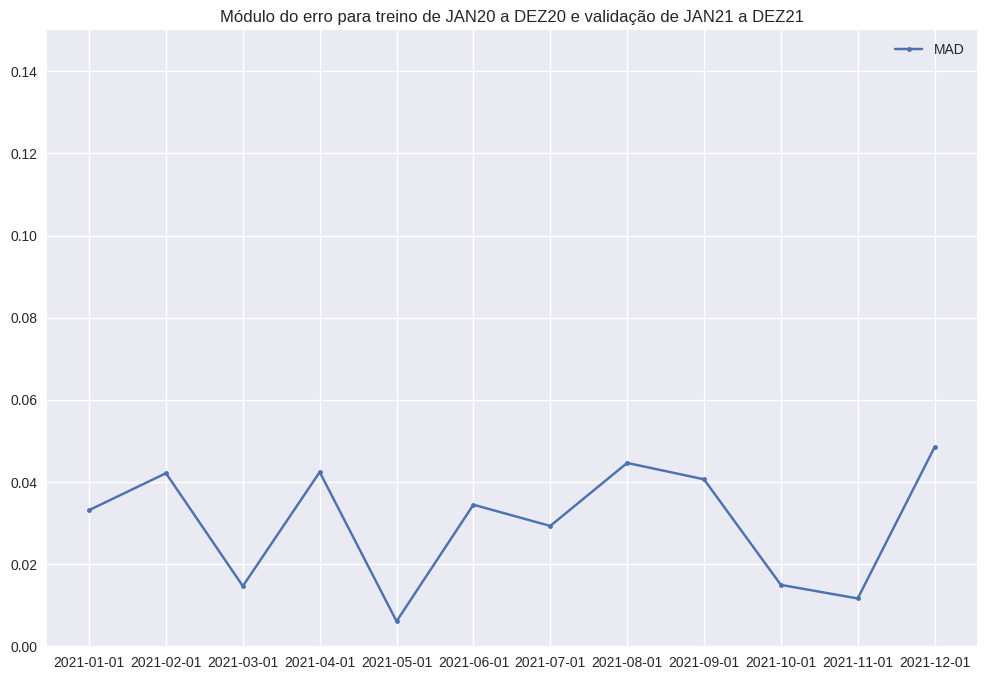

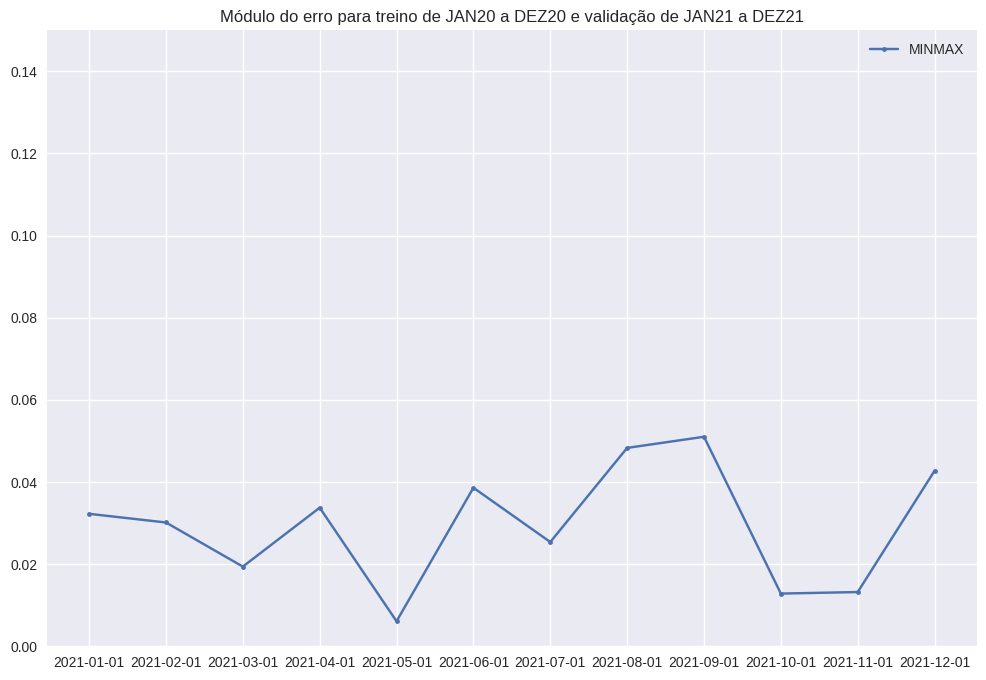

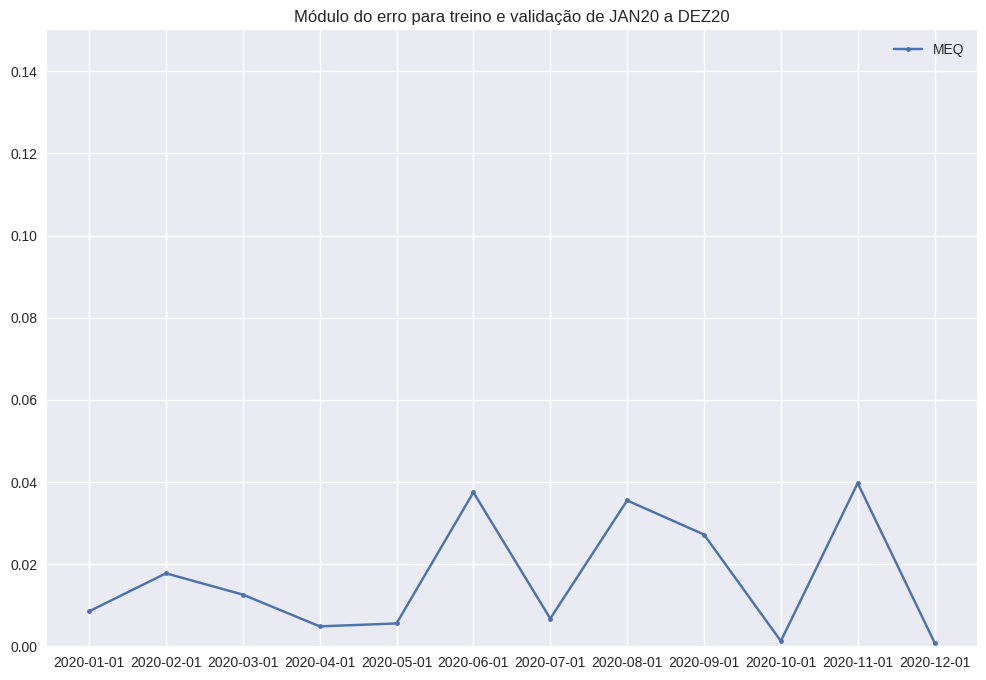

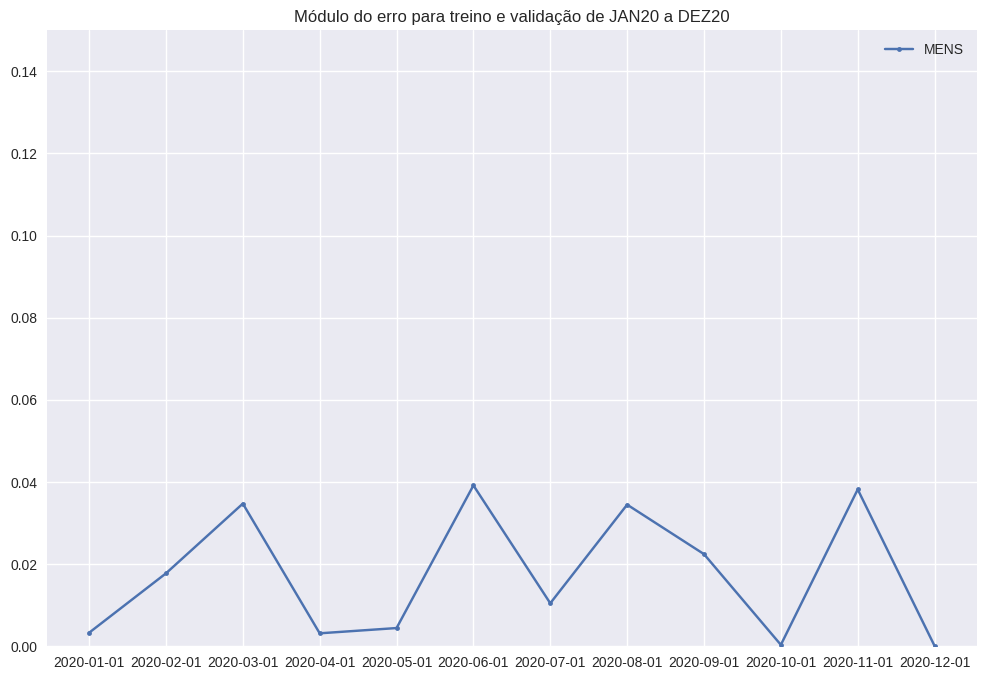

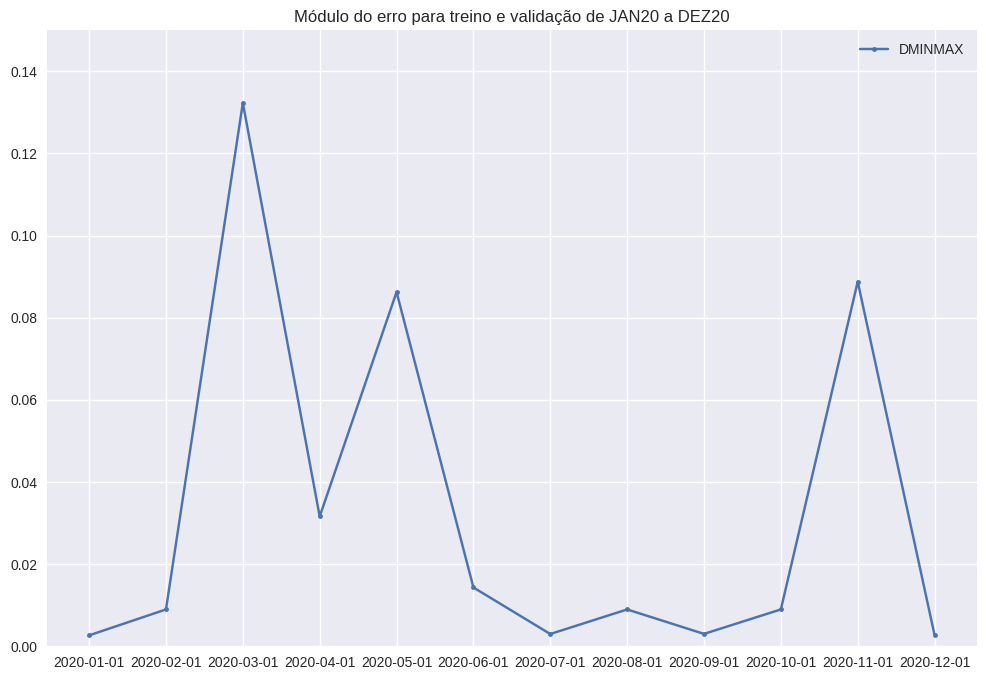

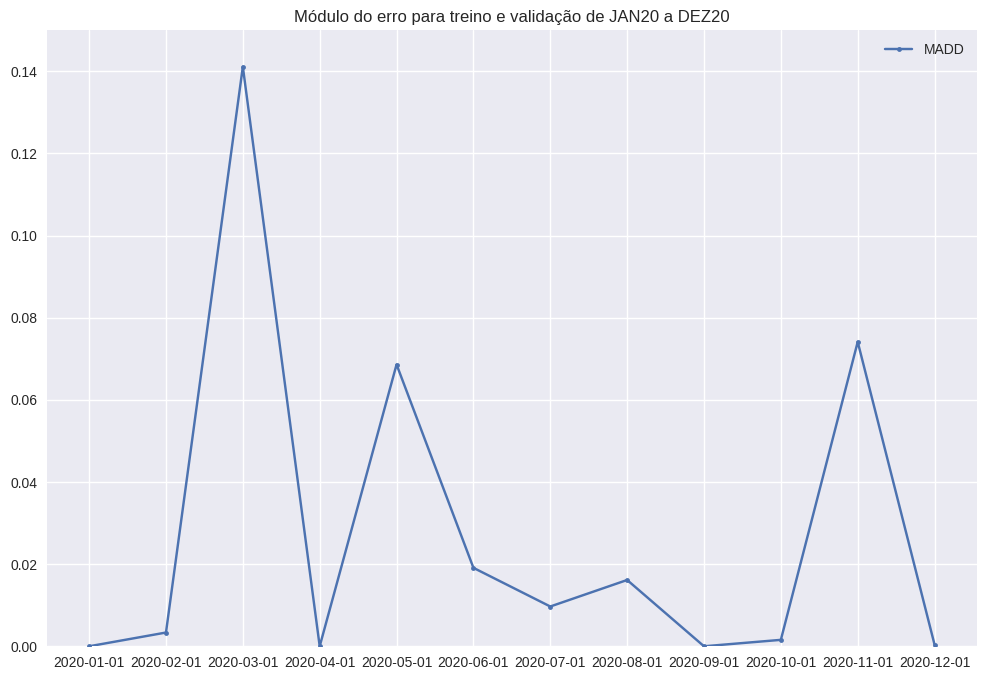

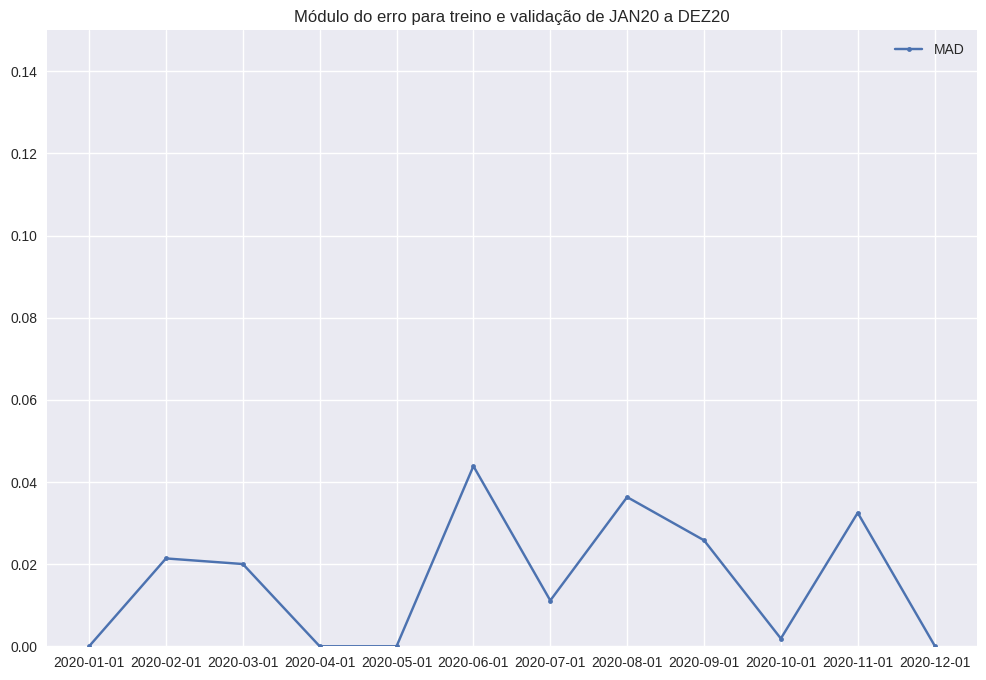

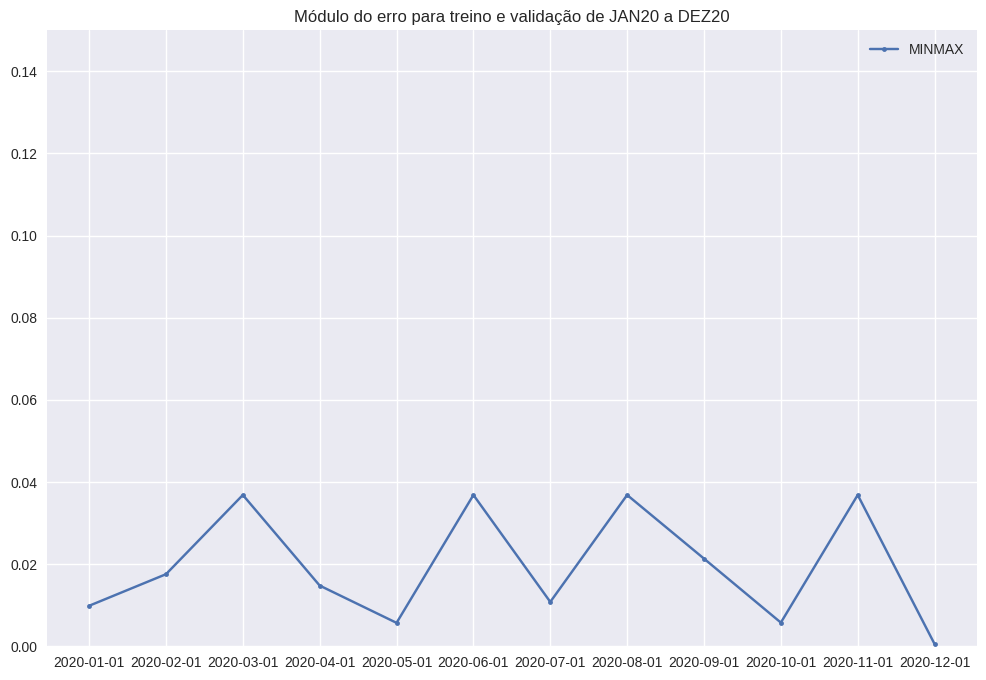

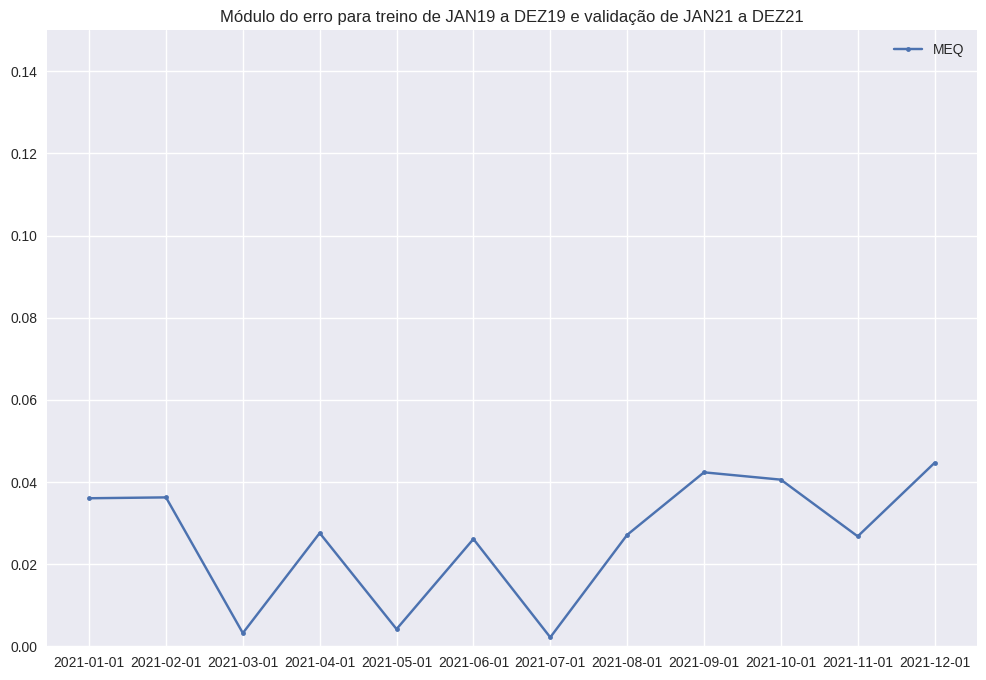

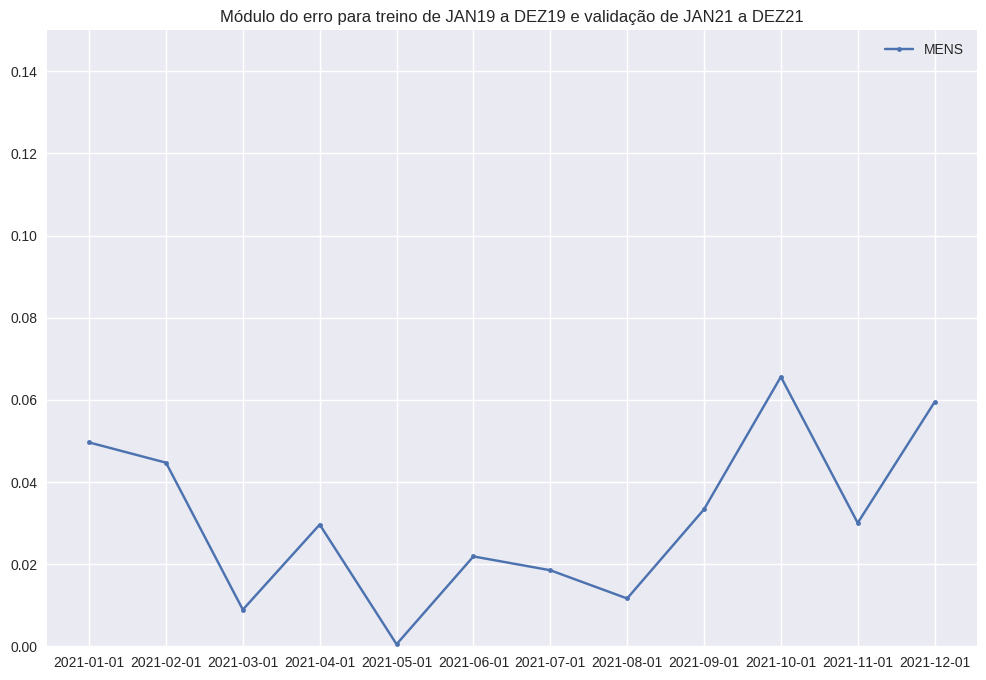

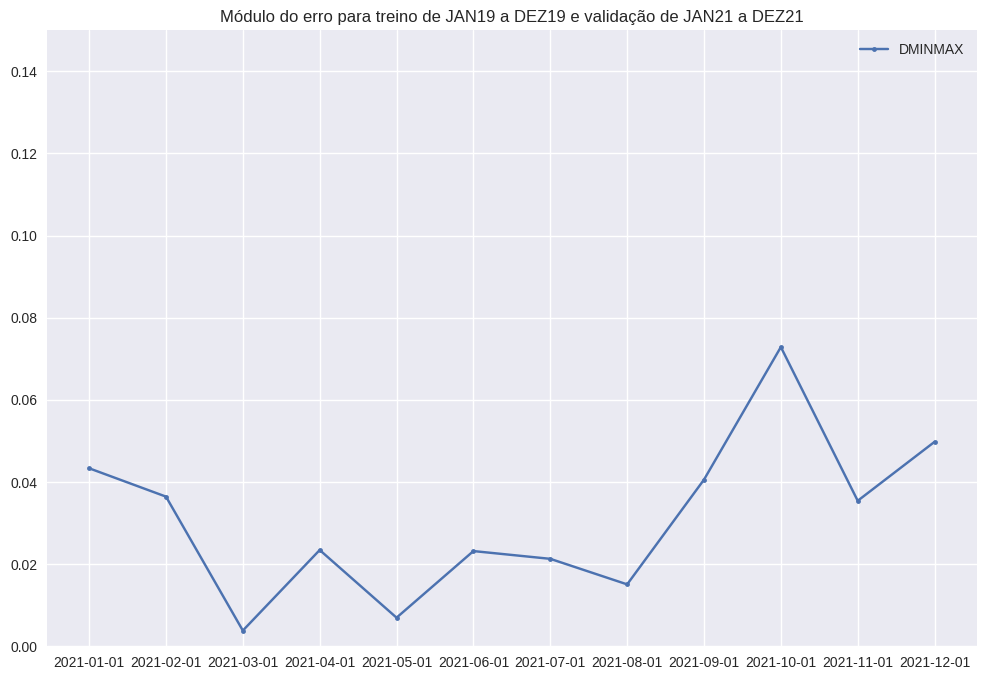

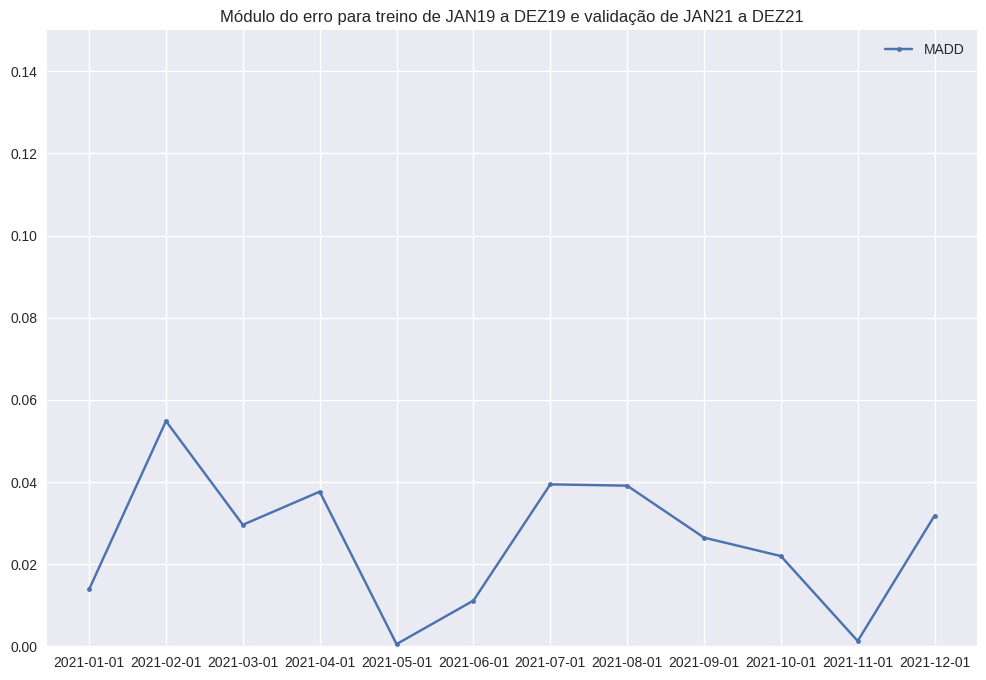

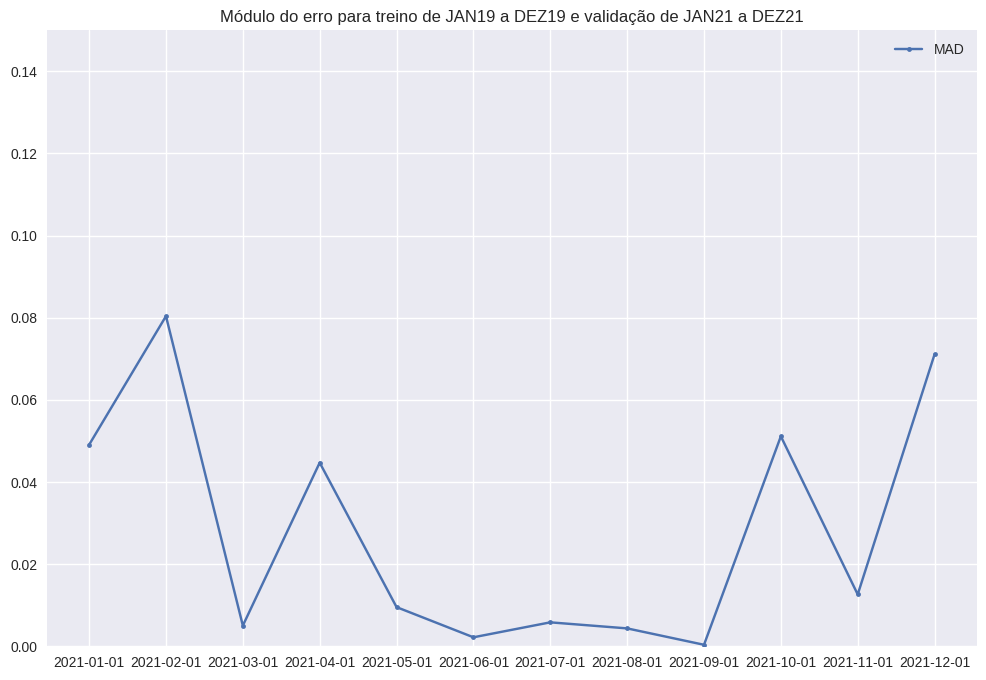

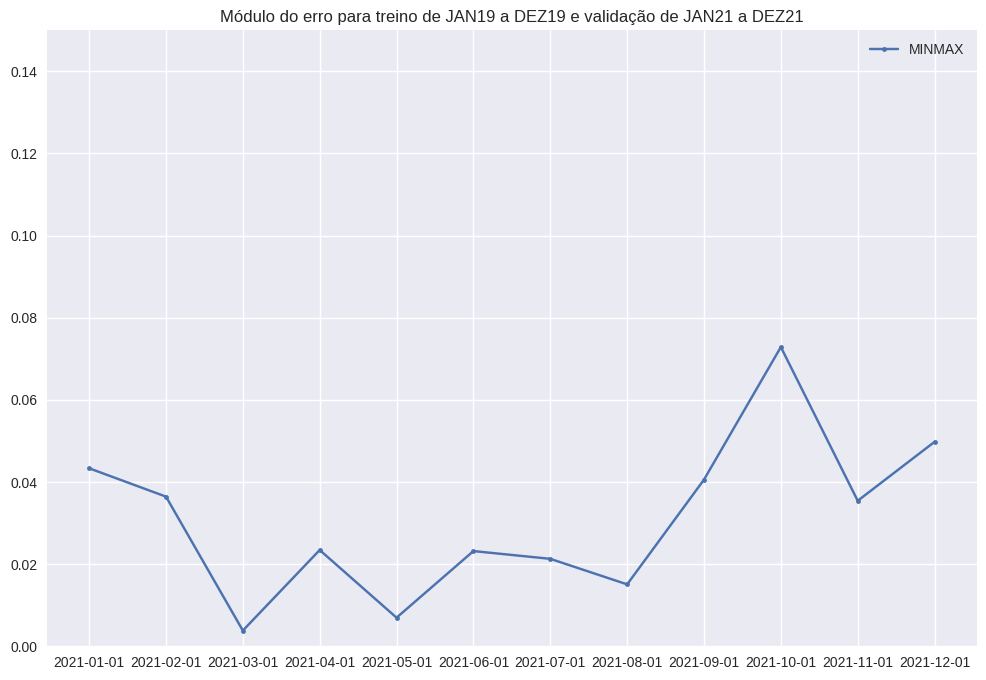

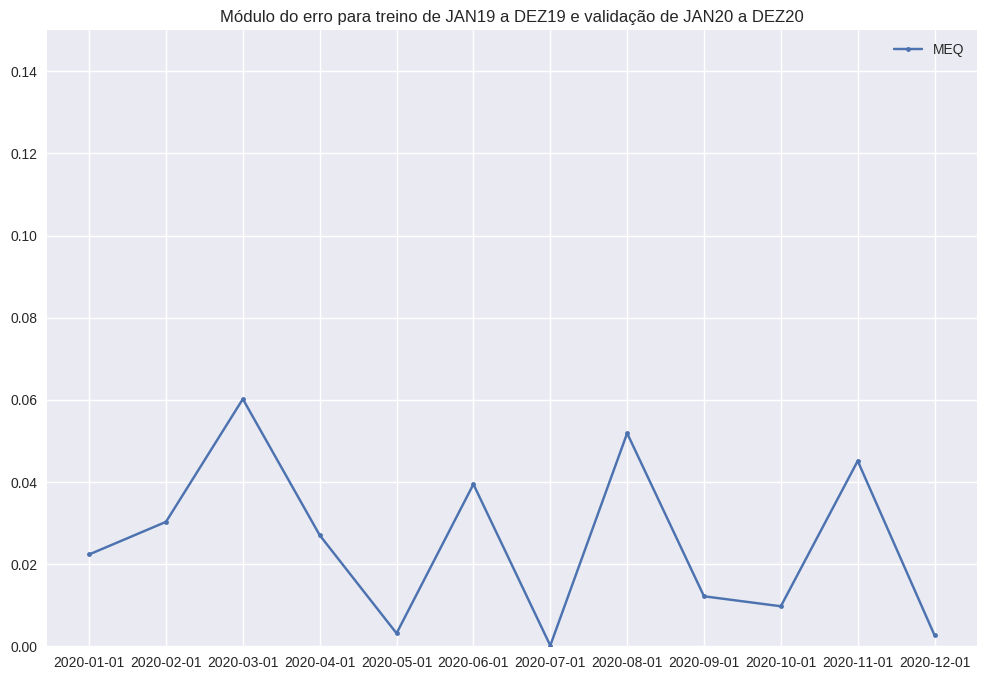

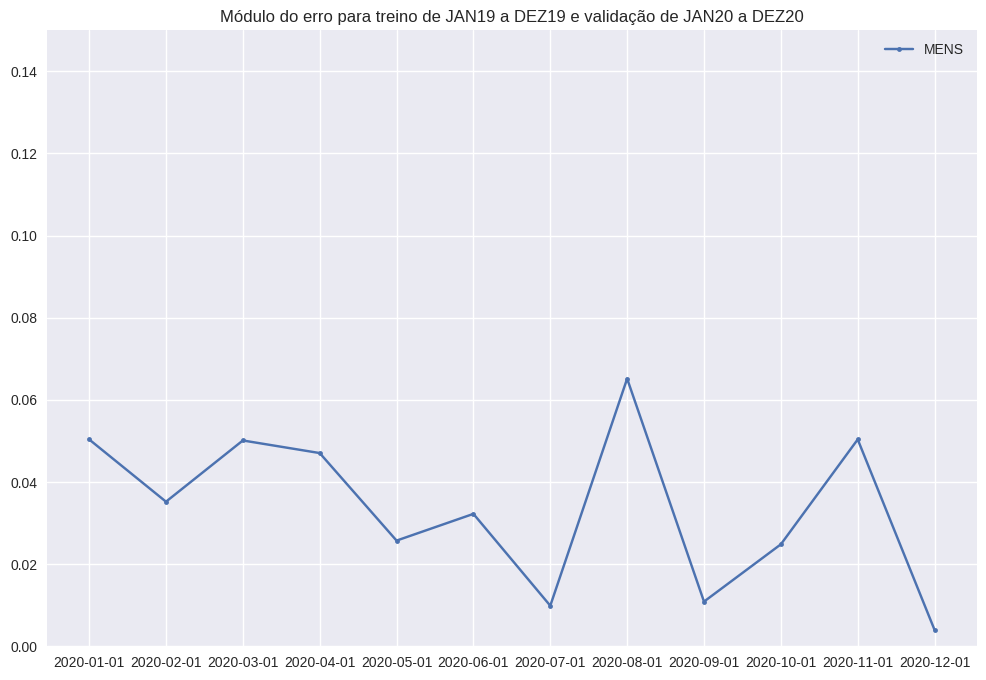

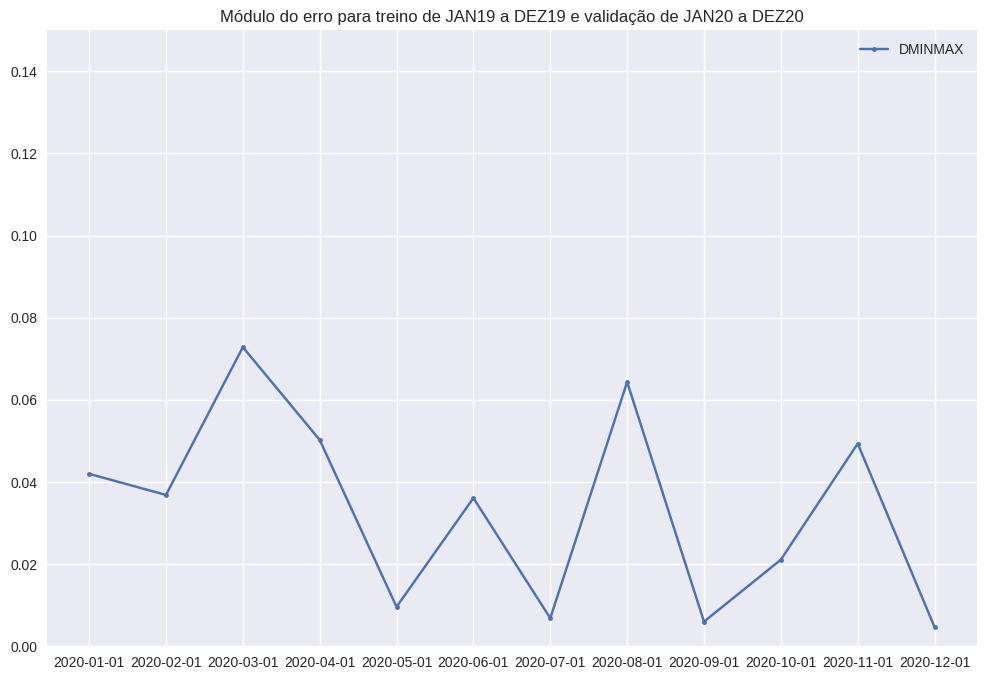

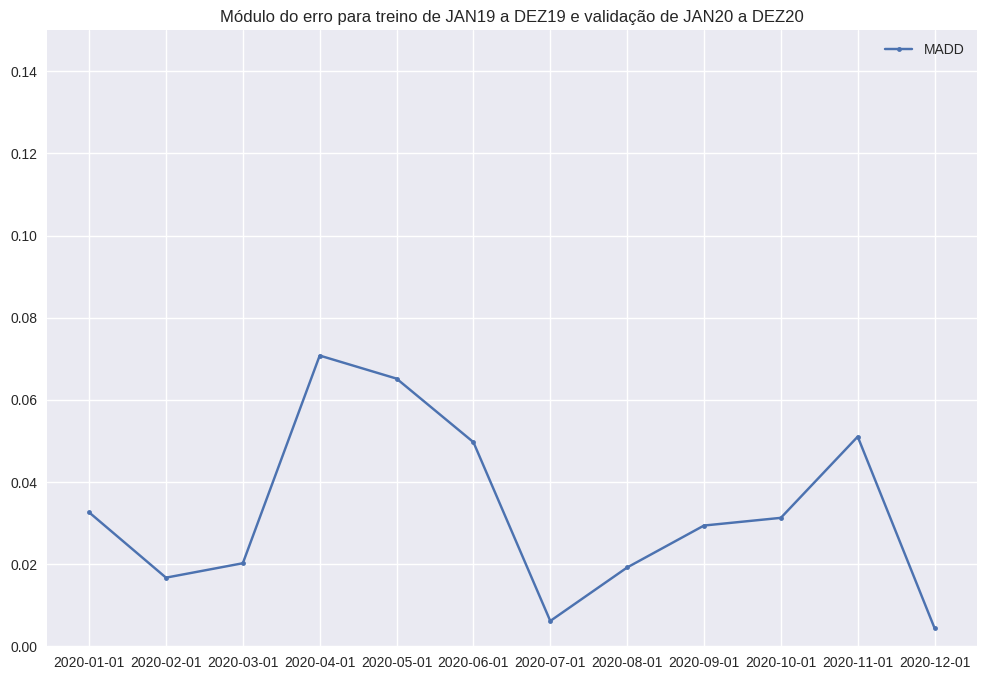

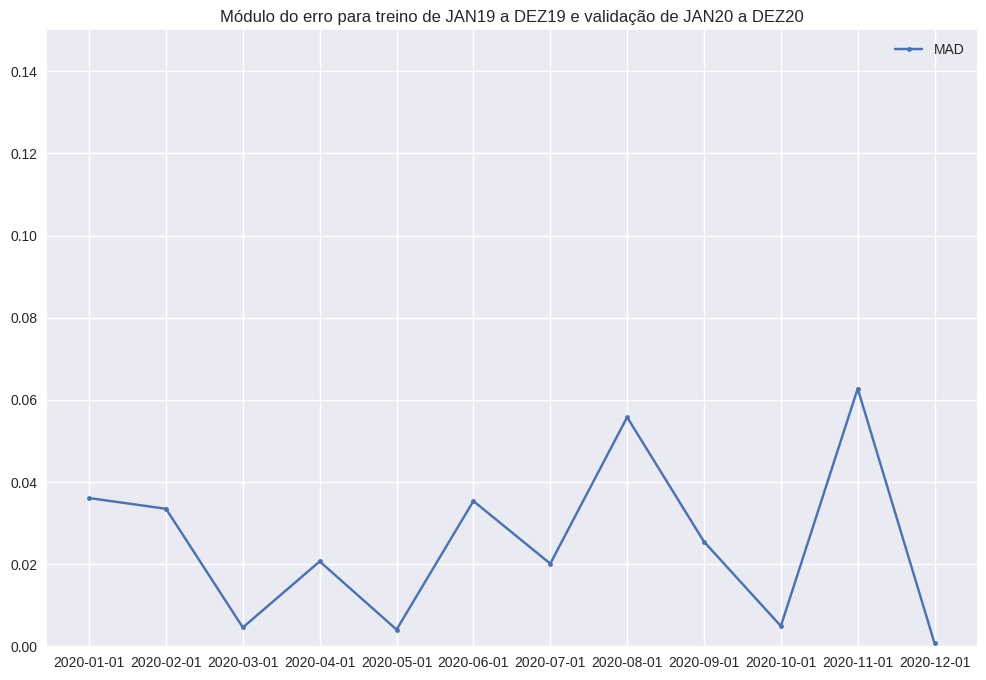

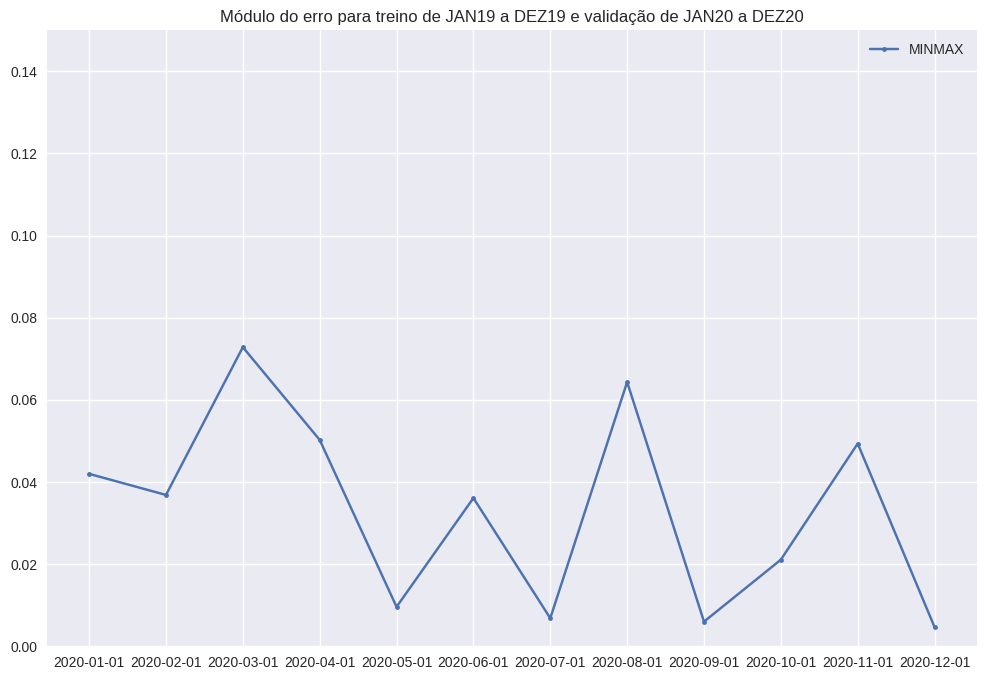

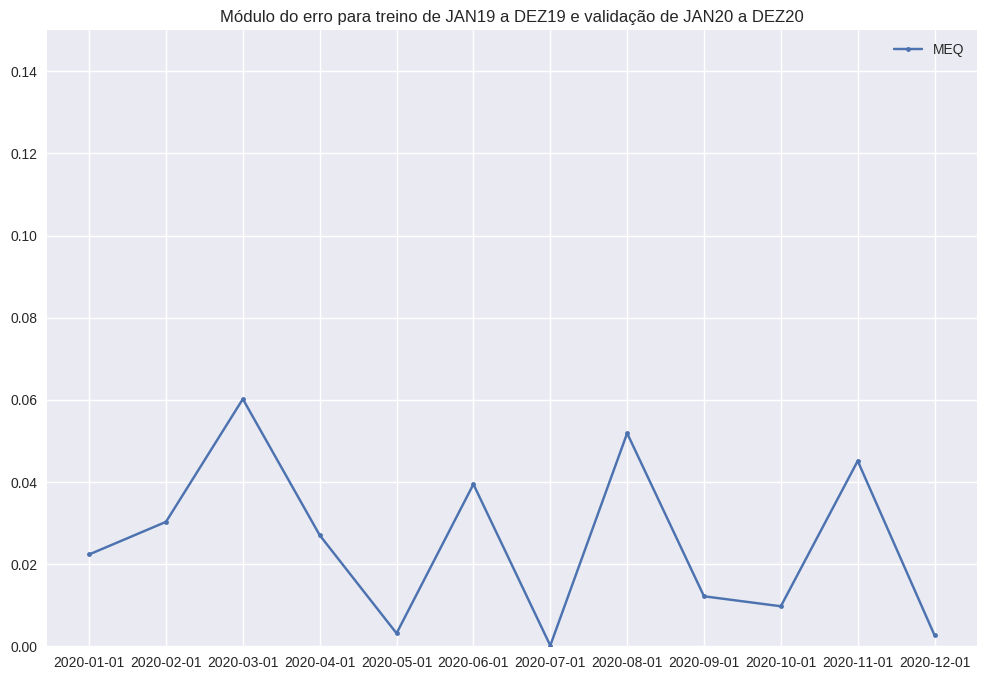

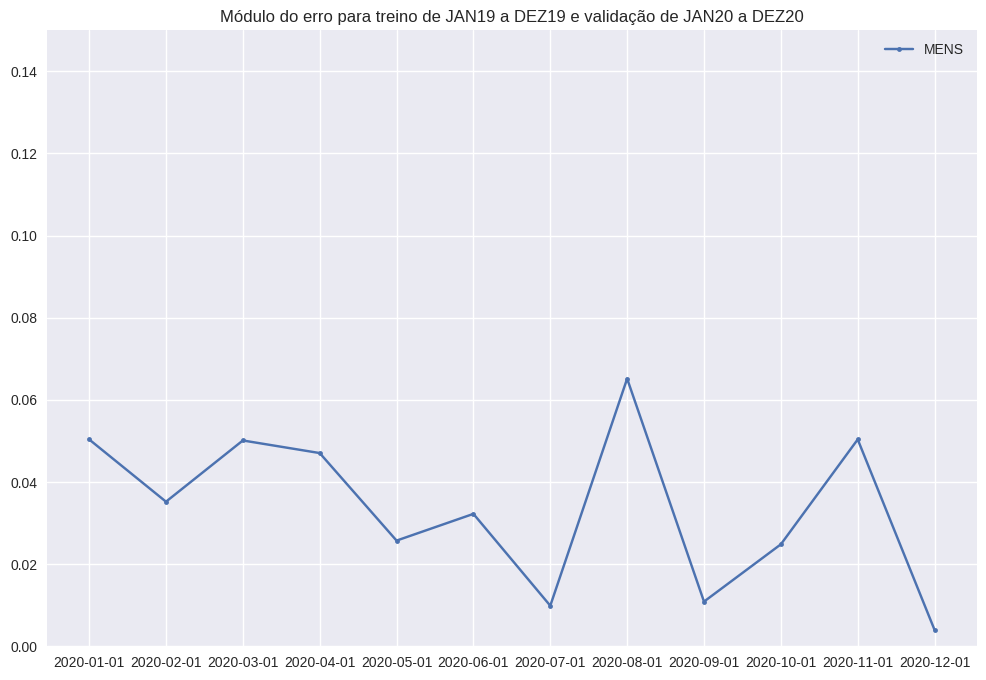

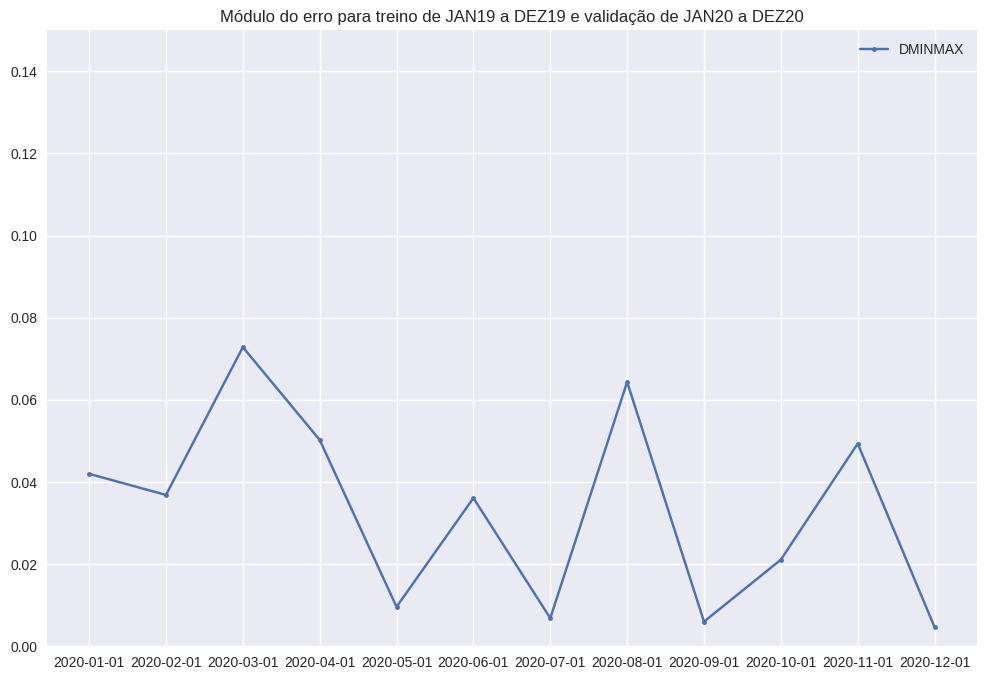

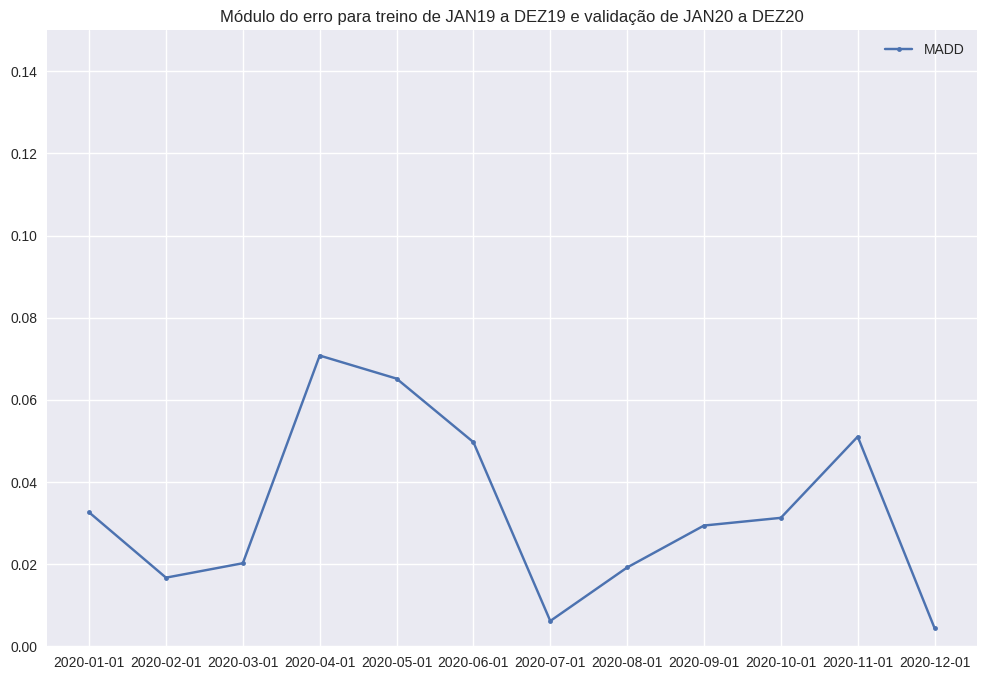

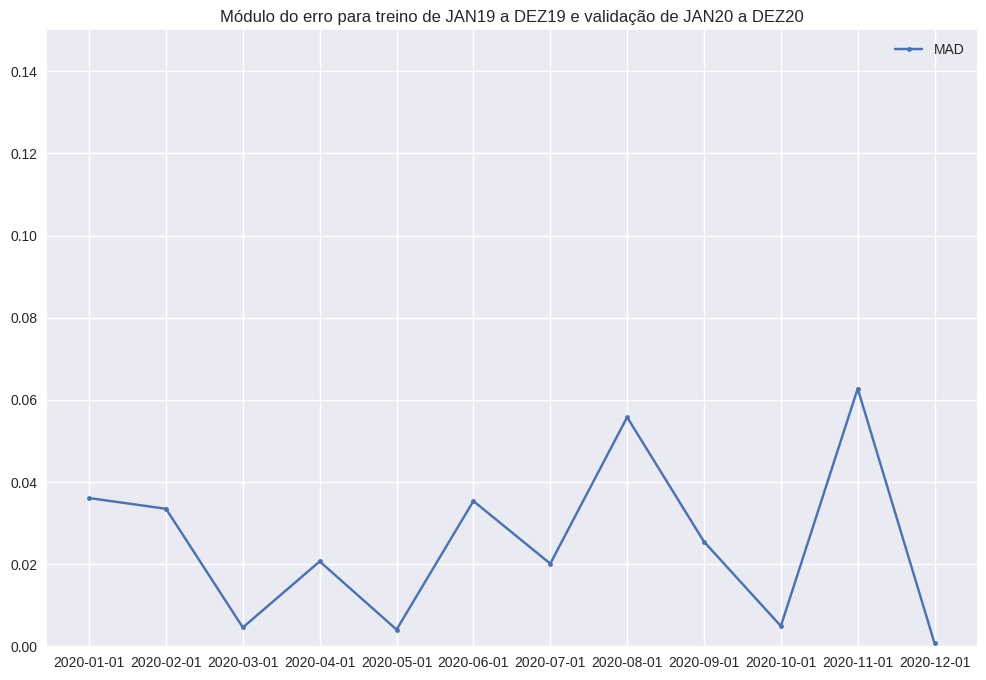

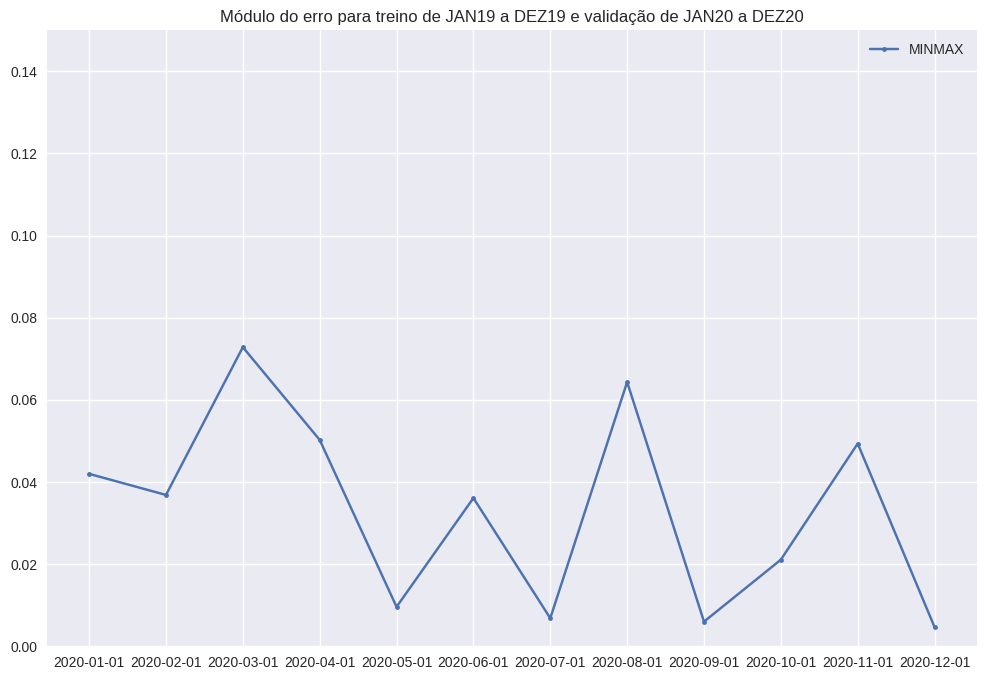

In [4]:
create_graphs("2021-01-01", "2021-12-01", "2021-01-01", "2021-12-01")
create_graphs("2020-01-01", "2020-12-01", "2021-01-01", "2021-12-01")
create_graphs("2020-01-01", "2020-12-01", "2020-01-01", "2020-12-01")
create_graphs("2019-01-01", "2019-12-01", "2021-01-01", "2021-12-01")
create_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01")
create_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01")

In [5]:
def create_general_graphs(t_start_date, t_end_date, v_start_date, v_end_date, 
                          model_list, metodos, folder="T1a_V1a_anual"):
    t_form_initial_date = format_date(t_start_date)
    t_form_final_date = format_date(t_end_date)

    v_form_initial_date = format_date(v_start_date)
    v_form_final_date = format_date(v_end_date)

    train_folder = (f"T_{t_start_date}_{t_end_date}")
    validation_folder = (f"V_{v_start_date}_{v_end_date}")

    path = f'../{folder}/{train_folder}/{validation_folder}'

    plt.style.use('seaborn')
    plt.figure(figsize=(12, 8))

    for file in os.listdir(path):
        if file.endswith(".csv"):

            model = file.split('.')[0]

            if model in model_list:
                df_results = pd.read_csv(f'{path}/{model}.csv')
                err = abs(df_results['variacao_carteira'] - df_results['variacao_benchmark'])
                plt.plot(df_results['datas'], err, marker = '.', label=model)

            plt.legend()

    plt.ylim([0.0, 0.15])
    plt.xlabel('Período')
    plt.ylabel('Variação')


    if (t_start_date == v_start_date) & (t_end_date == v_end_date):
        plt.title(f"Módulo do erro para treino e validação de {t_form_initial_date} a {t_form_final_date} para {metodos}")
    else:
        plt.title(f"Módulo do errp para treino de {t_form_initial_date} a {t_form_final_date} e validação de "
                  f"{v_form_initial_date} a {v_form_final_date} para {metodos}")

    plt.savefig(f'{path}/graficos/mod_erro_{unidecode(metodos).lower().replace(" ", "_")}.png')
    plt.show()
    plt.close()

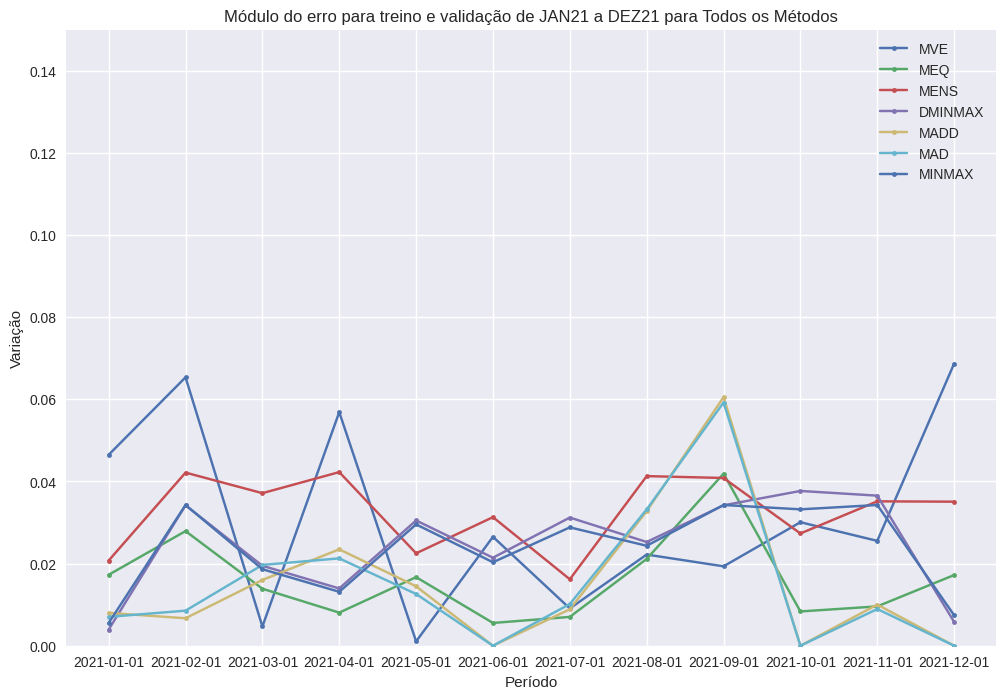

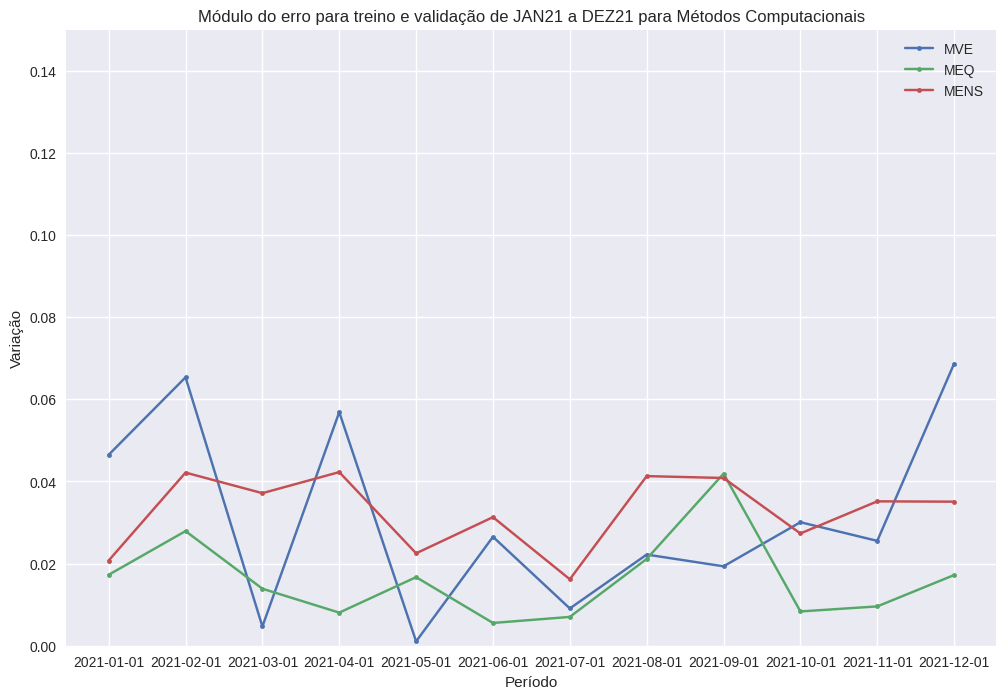

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


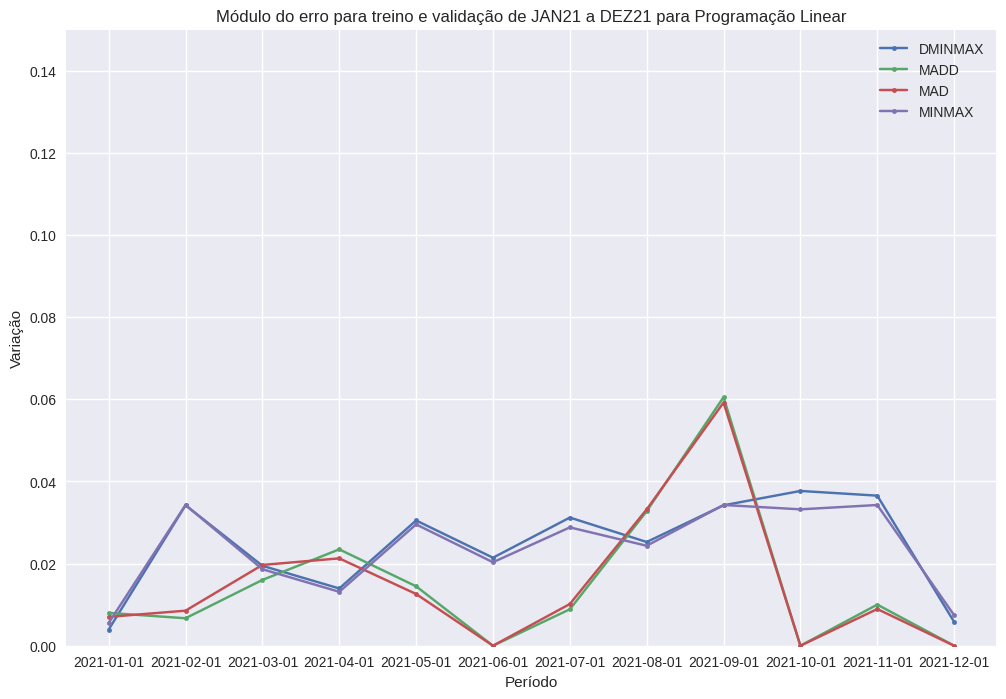

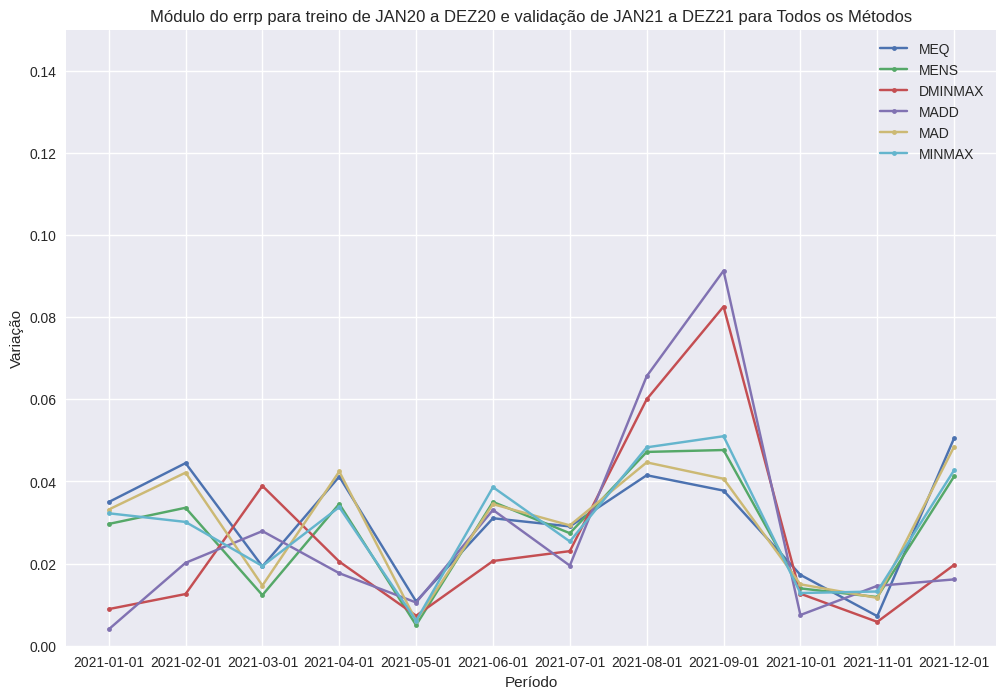

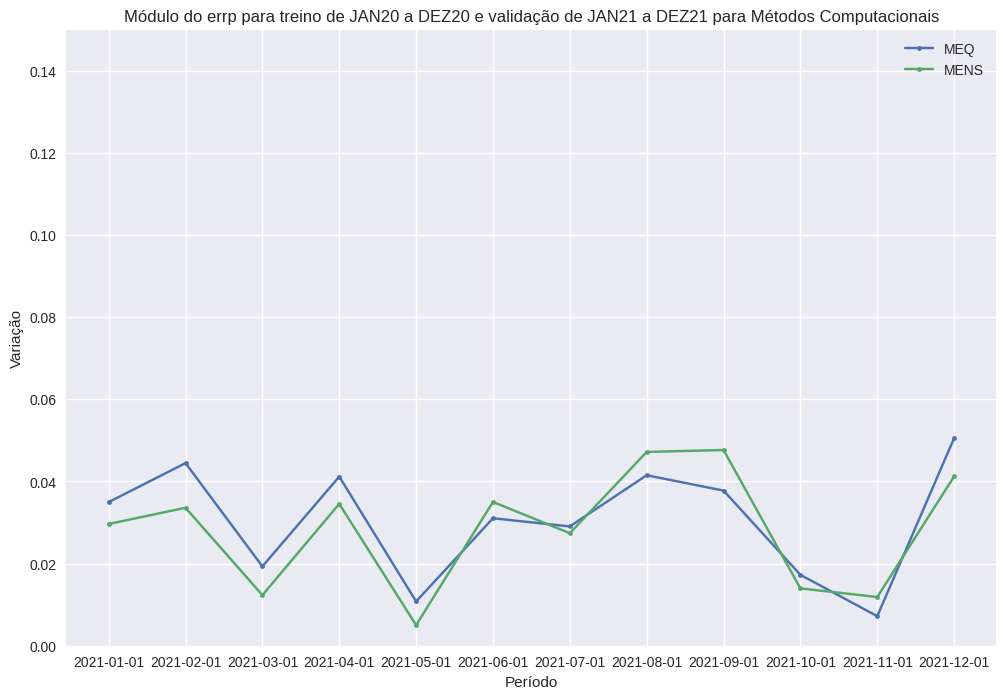

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


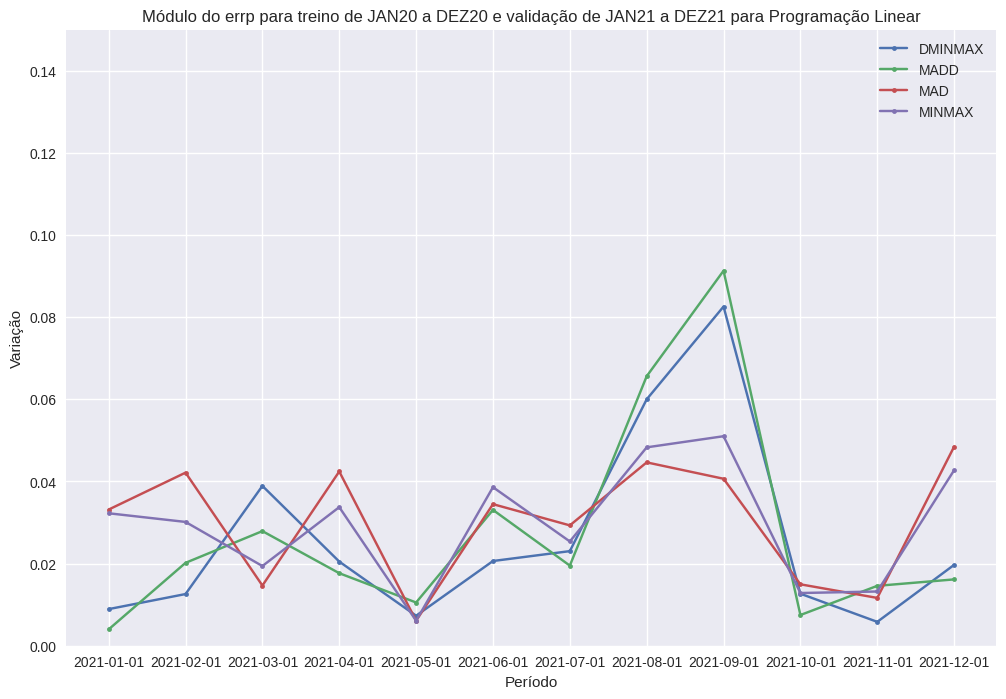

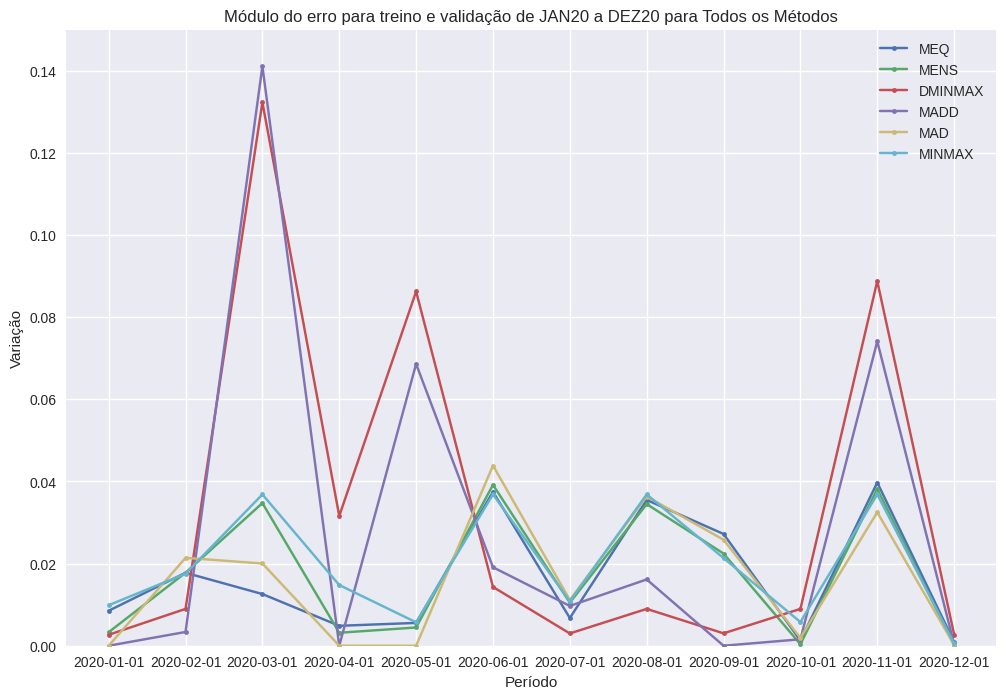

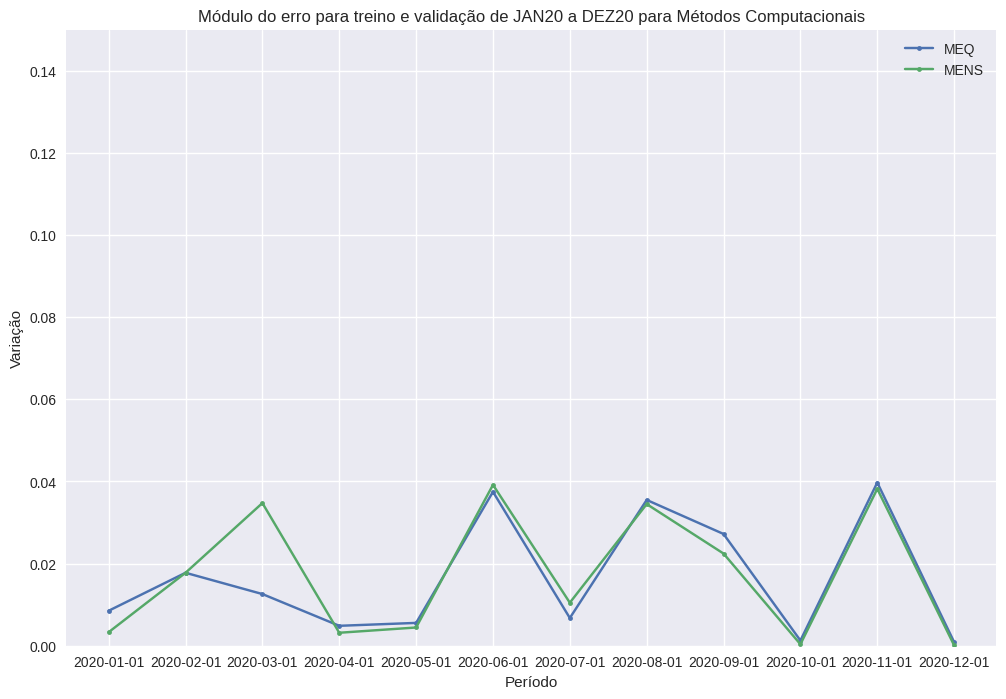

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


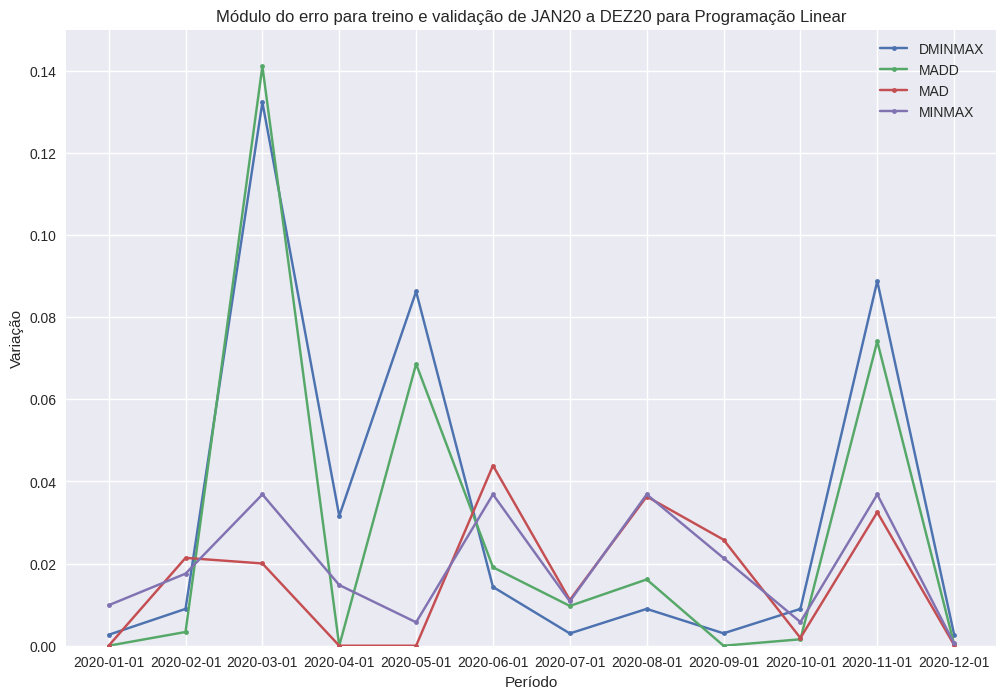

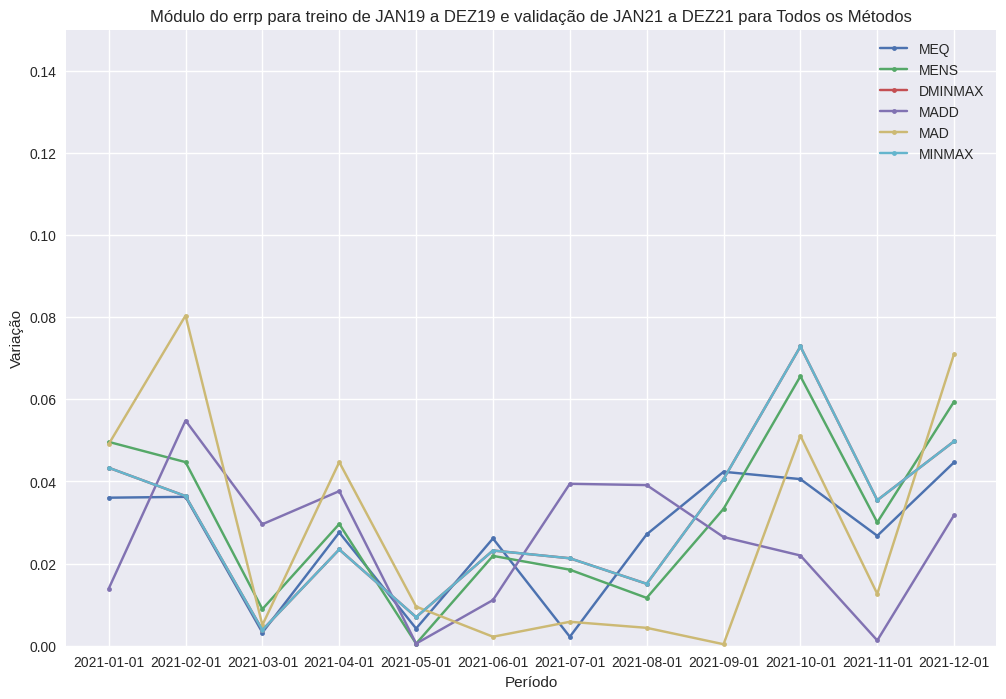

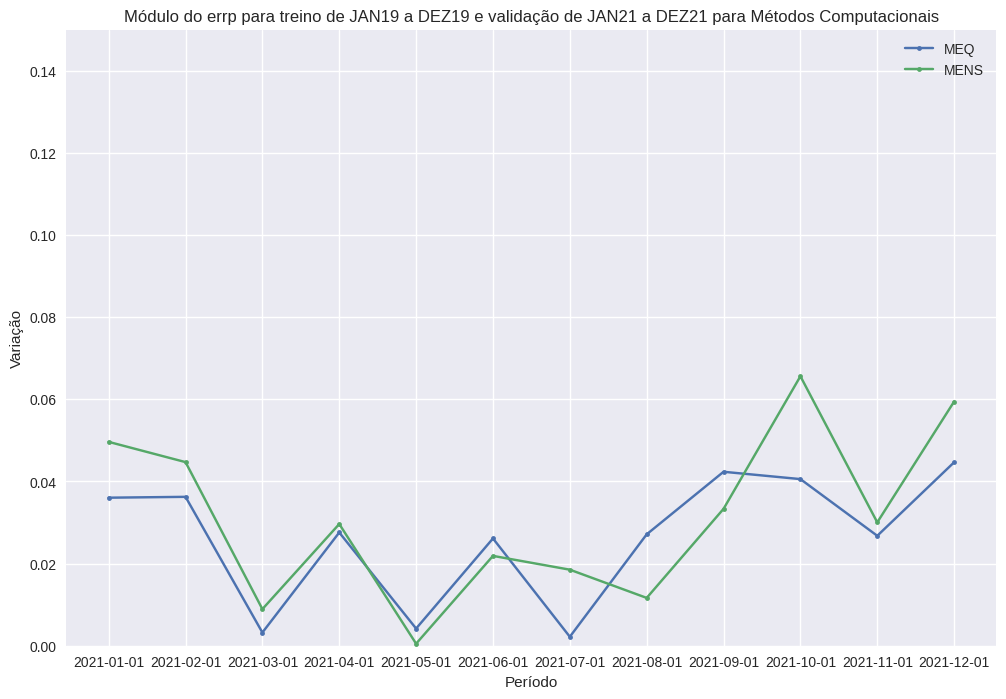

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


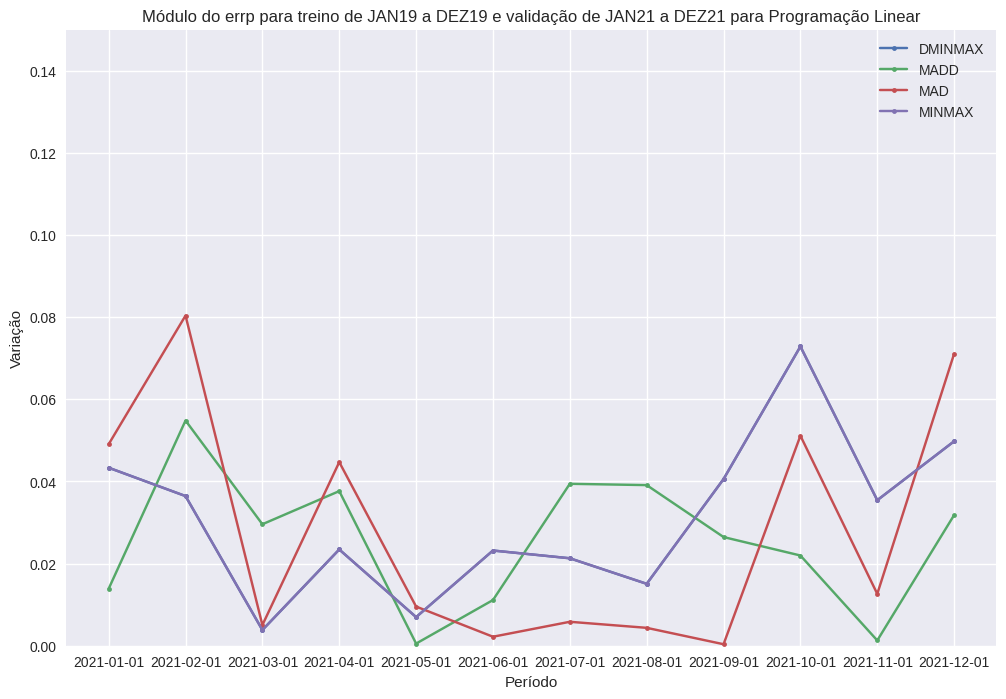

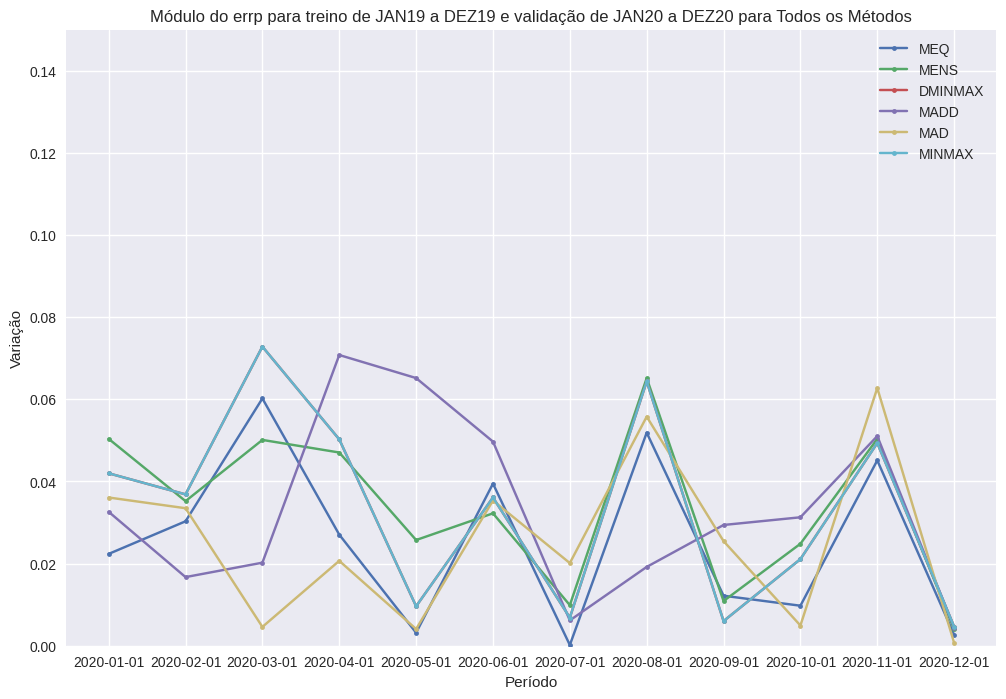

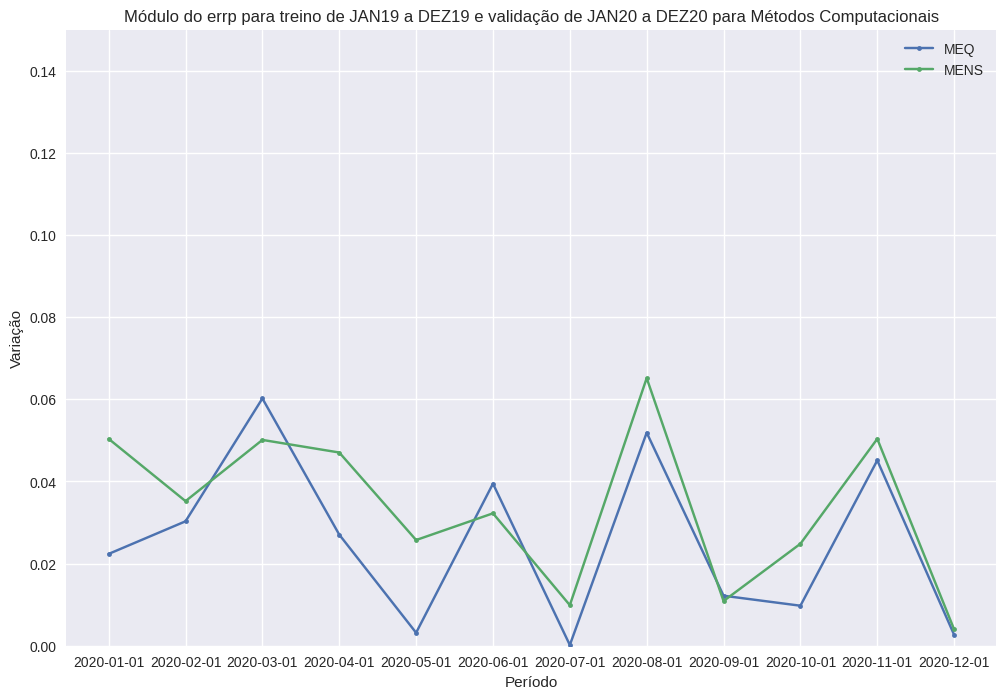

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


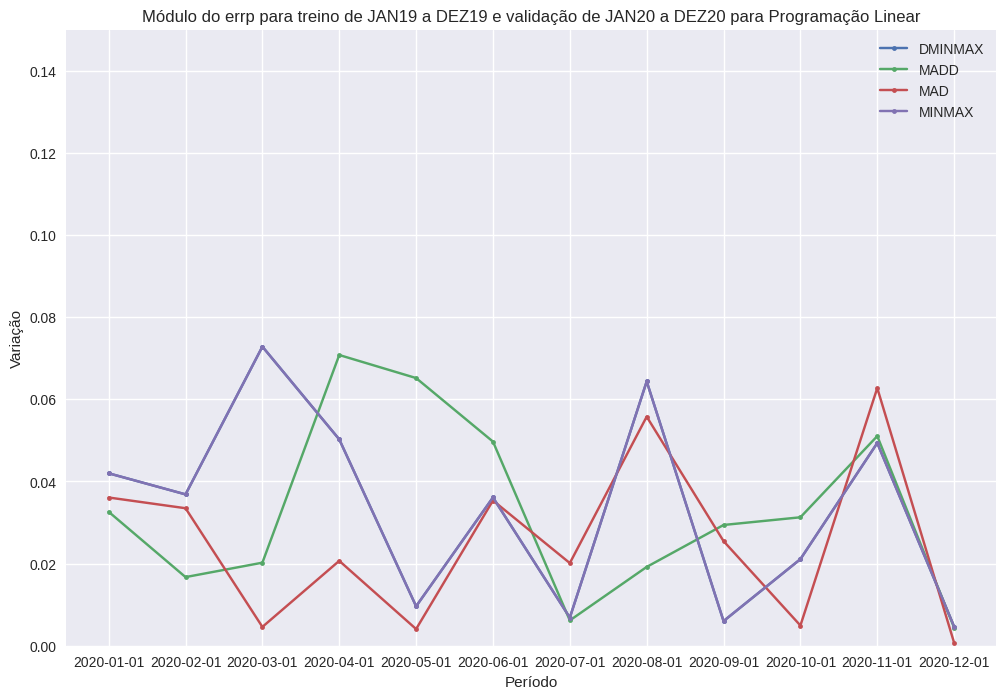

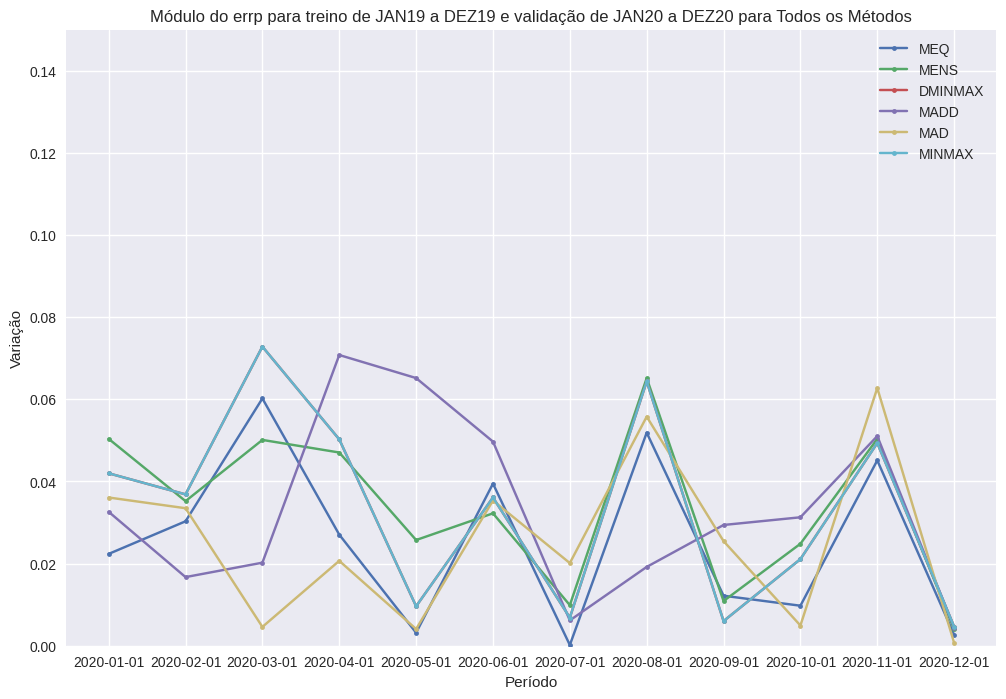

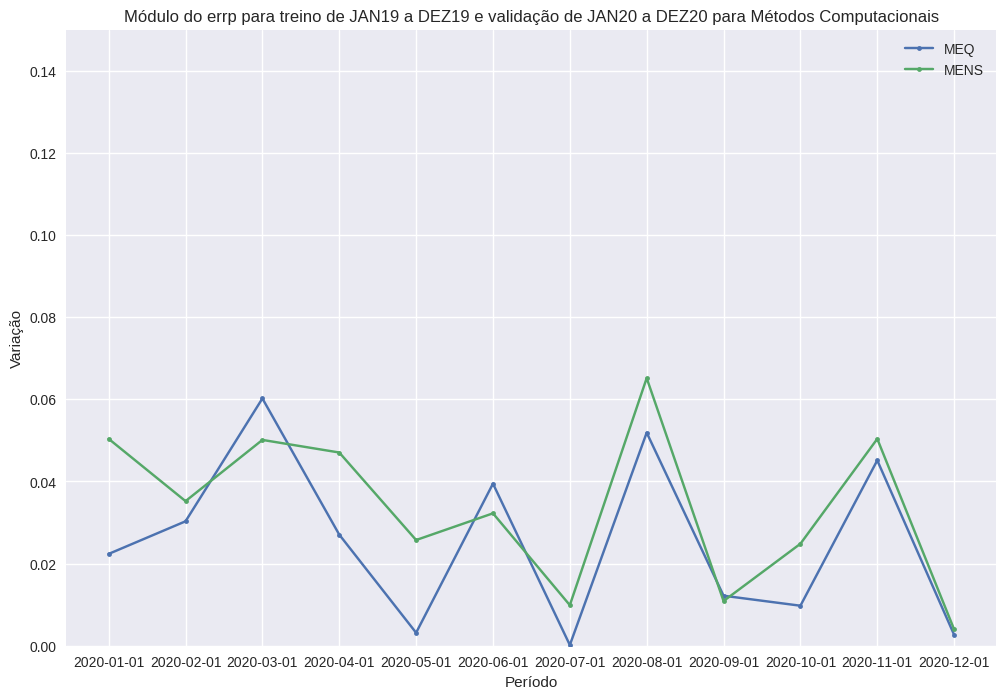

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


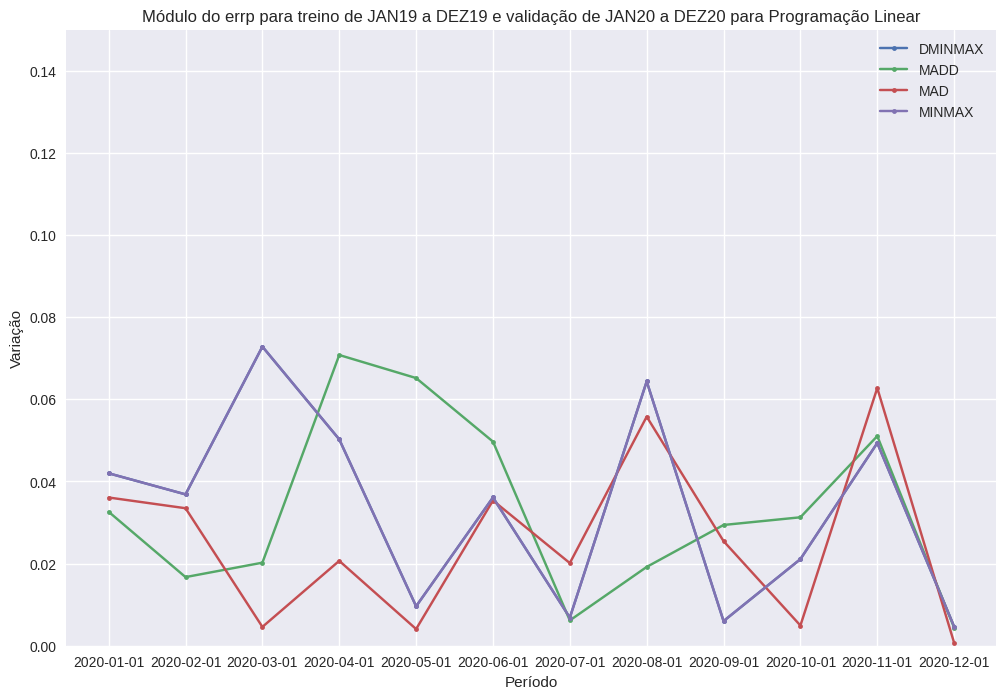

In [6]:
met_comp = ["MEQ", "MENS", "MVE"]
prog_lin = ["MAD", "MADD", "MINMAX", "DMINMAX"]
todos = met_comp + prog_lin

create_general_graphs("2021-01-01", "2021-12-01", "2021-01-01", "2021-12-01", todos, "Todos os Métodos")
create_general_graphs("2021-01-01", "2021-12-01", "2021-01-01", "2021-12-01", met_comp, "Métodos Computacionais")
create_general_graphs("2021-01-01", "2021-12-01", "2021-01-01", "2021-12-01", prog_lin, "Programação Linear")

create_general_graphs("2020-01-01", "2020-12-01", "2021-01-01", "2021-12-01", todos, "Todos os Métodos")
create_general_graphs("2020-01-01", "2020-12-01", "2021-01-01", "2021-12-01", met_comp, "Métodos Computacionais")
create_general_graphs("2020-01-01", "2020-12-01", "2021-01-01", "2021-12-01", prog_lin, "Programação Linear")

create_general_graphs("2020-01-01", "2020-12-01", "2020-01-01", "2020-12-01", todos, "Todos os Métodos")
create_general_graphs("2020-01-01", "2020-12-01", "2020-01-01", "2020-12-01", met_comp, "Métodos Computacionais")
create_general_graphs("2020-01-01", "2020-12-01", "2020-01-01", "2020-12-01", prog_lin, "Programação Linear")

create_general_graphs("2019-01-01", "2019-12-01", "2021-01-01", "2021-12-01", todos, "Todos os Métodos")
create_general_graphs("2019-01-01", "2019-12-01", "2021-01-01", "2021-12-01", met_comp, "Métodos Computacionais")
create_general_graphs("2019-01-01", "2019-12-01", "2021-01-01", "2021-12-01", prog_lin, "Programação Linear")

create_general_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01", todos, "Todos os Métodos")
create_general_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01", met_comp, "Métodos Computacionais")
create_general_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01", prog_lin, "Programação Linear")

create_general_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01", todos, "Todos os Métodos")
create_general_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01", met_comp, "Métodos Computacionais")
create_general_graphs("2019-01-01", "2019-12-01", "2020-01-01", "2020-12-01", prog_lin, "Programação Linear")